In [1]:
#Importing libraries
import pickle
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [2]:
with open(r'exporting_df.pickle','rb') as f:
    df = pickle.load(f)

In [3]:
df = df.drop('year', axis = 1)
df

,River_discharge(in_last_24hrs),potential_vorticity_1hPa,u_wind_1hPa,v_wind_1hPa,w_wind_1hPa,divergence_1hPa,temperature_1hPa,potential_vorticity_1000hPa,u_wind_1000hPa,v_wind_1000hPa,...,co2_emissions_from_transport,other_greenhouse_gas_emissions,agricultural_mehtane_emissions,total_greenhouse_gas_emissions,fertilizer_consumption,sea_level_average,resultant_wind_1hPa,resultant_wind_1000hPa,resultant_wind_10m,resultant_wind_100m
0,2.101562,0.002802,-7.816439,-5.226593,0.000297,7.053880e-06,259.246203,-1.090632e-08,-0.239269,-3.018019,...,11.552989,-102978.820300,440170.000000,1.313710e+06,74.701664,-0.0824,9.402871,3.028030,2.804782,3.019931
1,2.078125,0.000658,-0.117806,22.208657,-0.000408,7.781033e-07,259.417241,-8.546948e-09,-0.626276,-1.877082,...,11.551635,-102996.626250,440179.643836,1.313797e+06,74.705706,-0.1068,22.208970,1.978900,1.845877,1.965100
2,2.054688,0.000962,-0.972622,-0.616985,-0.000950,2.909997e-05,258.593771,4.972939e-10,1.720268,-1.117540,...,11.550281,-103014.432201,440189.287671,1.313884e+06,74.709747,-0.1306,1.151809,2.051567,1.982230,2.104176
3,2.031250,0.000822,5.333959,17.728443,-0.000902,1.385533e-05,257.637825,5.609257e-09,1.333982,1.234121,...,11.548927,-103032.238151,440198.931507,1.313971e+06,74.713788,-0.1558,18.513476,1.817504,1.654071,1.737014
4,2.015625,0.000857,-3.550301,-1.882606,-0.000670,7.861906e-07,257.666435,1.168928e-07,3.434773,1.690171,...,11.547572,-103050.044102,440208.575342,1.314058e+06,74.717830,-0.1681,4.018562,3.828118,3.238428,3.633774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,3.281250,0.004435,30.584098,10.751357,-0.000394,-1.456358e-05,264.087510,-8.940176e-09,-0.784105,-5.340466,...,10.935903,-401894.913670,497898.863753,3.508361e+06,170.186653,-0.0085,32.418803,5.397728,4.936531,5.311426
10216,3.250000,0.002959,-4.735927,-14.967420,-0.000343,2.079427e-05,262.464204,-3.646613e-08,-0.400702,-6.191706,...,10.935529,-401973.807036,497902.935443,3.508600e+06,170.187631,-0.0095,15.698811,6.204732,5.599524,6.118130
10217,3.203125,0.002640,-29.279454,-12.567594,-0.001001,5.218054e-06,266.654323,-3.607290e-08,0.548438,-4.610137,...,10.935155,-402052.700402,497907.007132,3.508840e+06,170.188610,-0.0014,31.862688,4.642646,4.315522,4.664586
10218,3.156250,0.000028,-26.159245,0.501047,-0.000909,2.187798e-05,262.212934,-1.051309e-08,0.183051,-2.215468,...,10.934781,-402131.593768,497911.078821,3.509079e+06,170.189589,0.0117,26.164043,2.223051,2.113621,2.256691


In [4]:
#Standard Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns = df.columns)

In [5]:
scaled_df

,River_discharge(in_last_24hrs),potential_vorticity_1hPa,u_wind_1hPa,v_wind_1hPa,w_wind_1hPa,divergence_1hPa,temperature_1hPa,potential_vorticity_1000hPa,u_wind_1000hPa,v_wind_1000hPa,...,co2_emissions_from_transport,other_greenhouse_gas_emissions,agricultural_mehtane_emissions,total_greenhouse_gas_emissions,fertilizer_consumption,sea_level_average,resultant_wind_1hPa,resultant_wind_1000hPa,resultant_wind_10m,resultant_wind_100m
0,-0.071330,0.182523,-0.073511,-1.042288,0.491092,0.258761,-0.888381,-0.057325,-0.193350,-0.762068,...,0.527138,0.509749,-1.100376,-0.627683,-0.955384,-0.276237,-0.554374,-0.394687,-0.389684,-0.366589
1,-0.072509,-1.482507,0.138006,2.014190,-0.337256,0.047949,-0.848491,-0.019108,-0.307447,-0.604232,...,0.525414,0.509431,-1.100084,-0.627610,-0.955321,-0.367691,0.096106,-0.640415,-0.629361,-0.587918
2,-0.073688,-1.246447,0.114520,-0.528746,-0.974426,0.999321,-1.040543,0.127389,0.384362,-0.499158,...,0.523690,0.509113,-1.099791,-0.627538,-0.955259,-0.456897,-0.973483,-0.623395,-0.595279,-0.558737
3,-0.074867,-1.355175,0.287792,1.515063,-0.917888,0.487232,-1.263490,0.210191,0.270477,-0.173833,...,0.521966,0.508795,-1.099499,-0.627465,-0.955196,-0.551349,-0.091605,-0.678217,-0.677302,-0.635776
4,-0.075653,-1.327683,0.043700,-0.669745,-0.644665,0.048221,-1.256818,2.012739,0.889833,-0.110743,...,0.520242,0.508477,-1.099207,-0.627392,-0.955134,-0.597451,-0.827867,-0.207289,-0.281295,-0.237790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,-0.011987,1.450881,0.981531,0.737767,-0.321215,-0.467400,0.240717,-0.025478,-0.353979,-1.083352,...,-0.258559,-4.829777,0.649525,1.204820,0.523373,0.000750,0.614709,0.160348,0.143143,0.114222
10216,-0.013559,0.304274,0.011125,-2.127485,-0.260206,0.720321,-0.137874,-0.471338,-0.240943,-1.201111,...,-0.259035,-4.831186,0.649649,1.205020,0.523388,-0.002999,-0.234575,0.349365,0.308857,0.283488
10217,-0.015917,0.056845,-0.663201,-1.860127,-1.033857,0.197093,0.839353,-0.464968,0.038882,-0.982319,...,-0.259511,-4.832595,0.649772,1.205220,0.523403,0.027361,0.586462,-0.016509,-0.012077,-0.021501
10218,-0.018275,-1.971578,-0.577474,-0.404189,-0.926566,0.756724,-0.196475,-0.050955,-0.068841,-0.651044,...,-0.259987,-4.834005,0.649896,1.205419,0.523418,0.076462,0.297002,-0.583230,-0.562439,-0.526735


In [6]:
scaled_df.dropna(inplace=True)
# Checking if there is NaN values in the dataset
scaled_df.isna().sum()

River_discharge(in_last_24hrs)                         0
potential_vorticity_1hPa                               0
u_wind_1hPa                                            0
v_wind_1hPa                                            0
w_wind_1hPa                                            0
divergence_1hPa                                        0
temperature_1hPa                                       0
potential_vorticity_1000hPa                            0
u_wind_1000hPa                                         0
v_wind_1000hPa                                         0
w_wind_1000hPa                                         0
divergence_1000hPa                                     0
temperature_1000hPa                                    0
u_component_wind_at_100m                               0
v_component_wind_at_100m                               0
u_component_wind_at_10m                                0
v_component_wind_at_10m                                0
temperature at 2m              

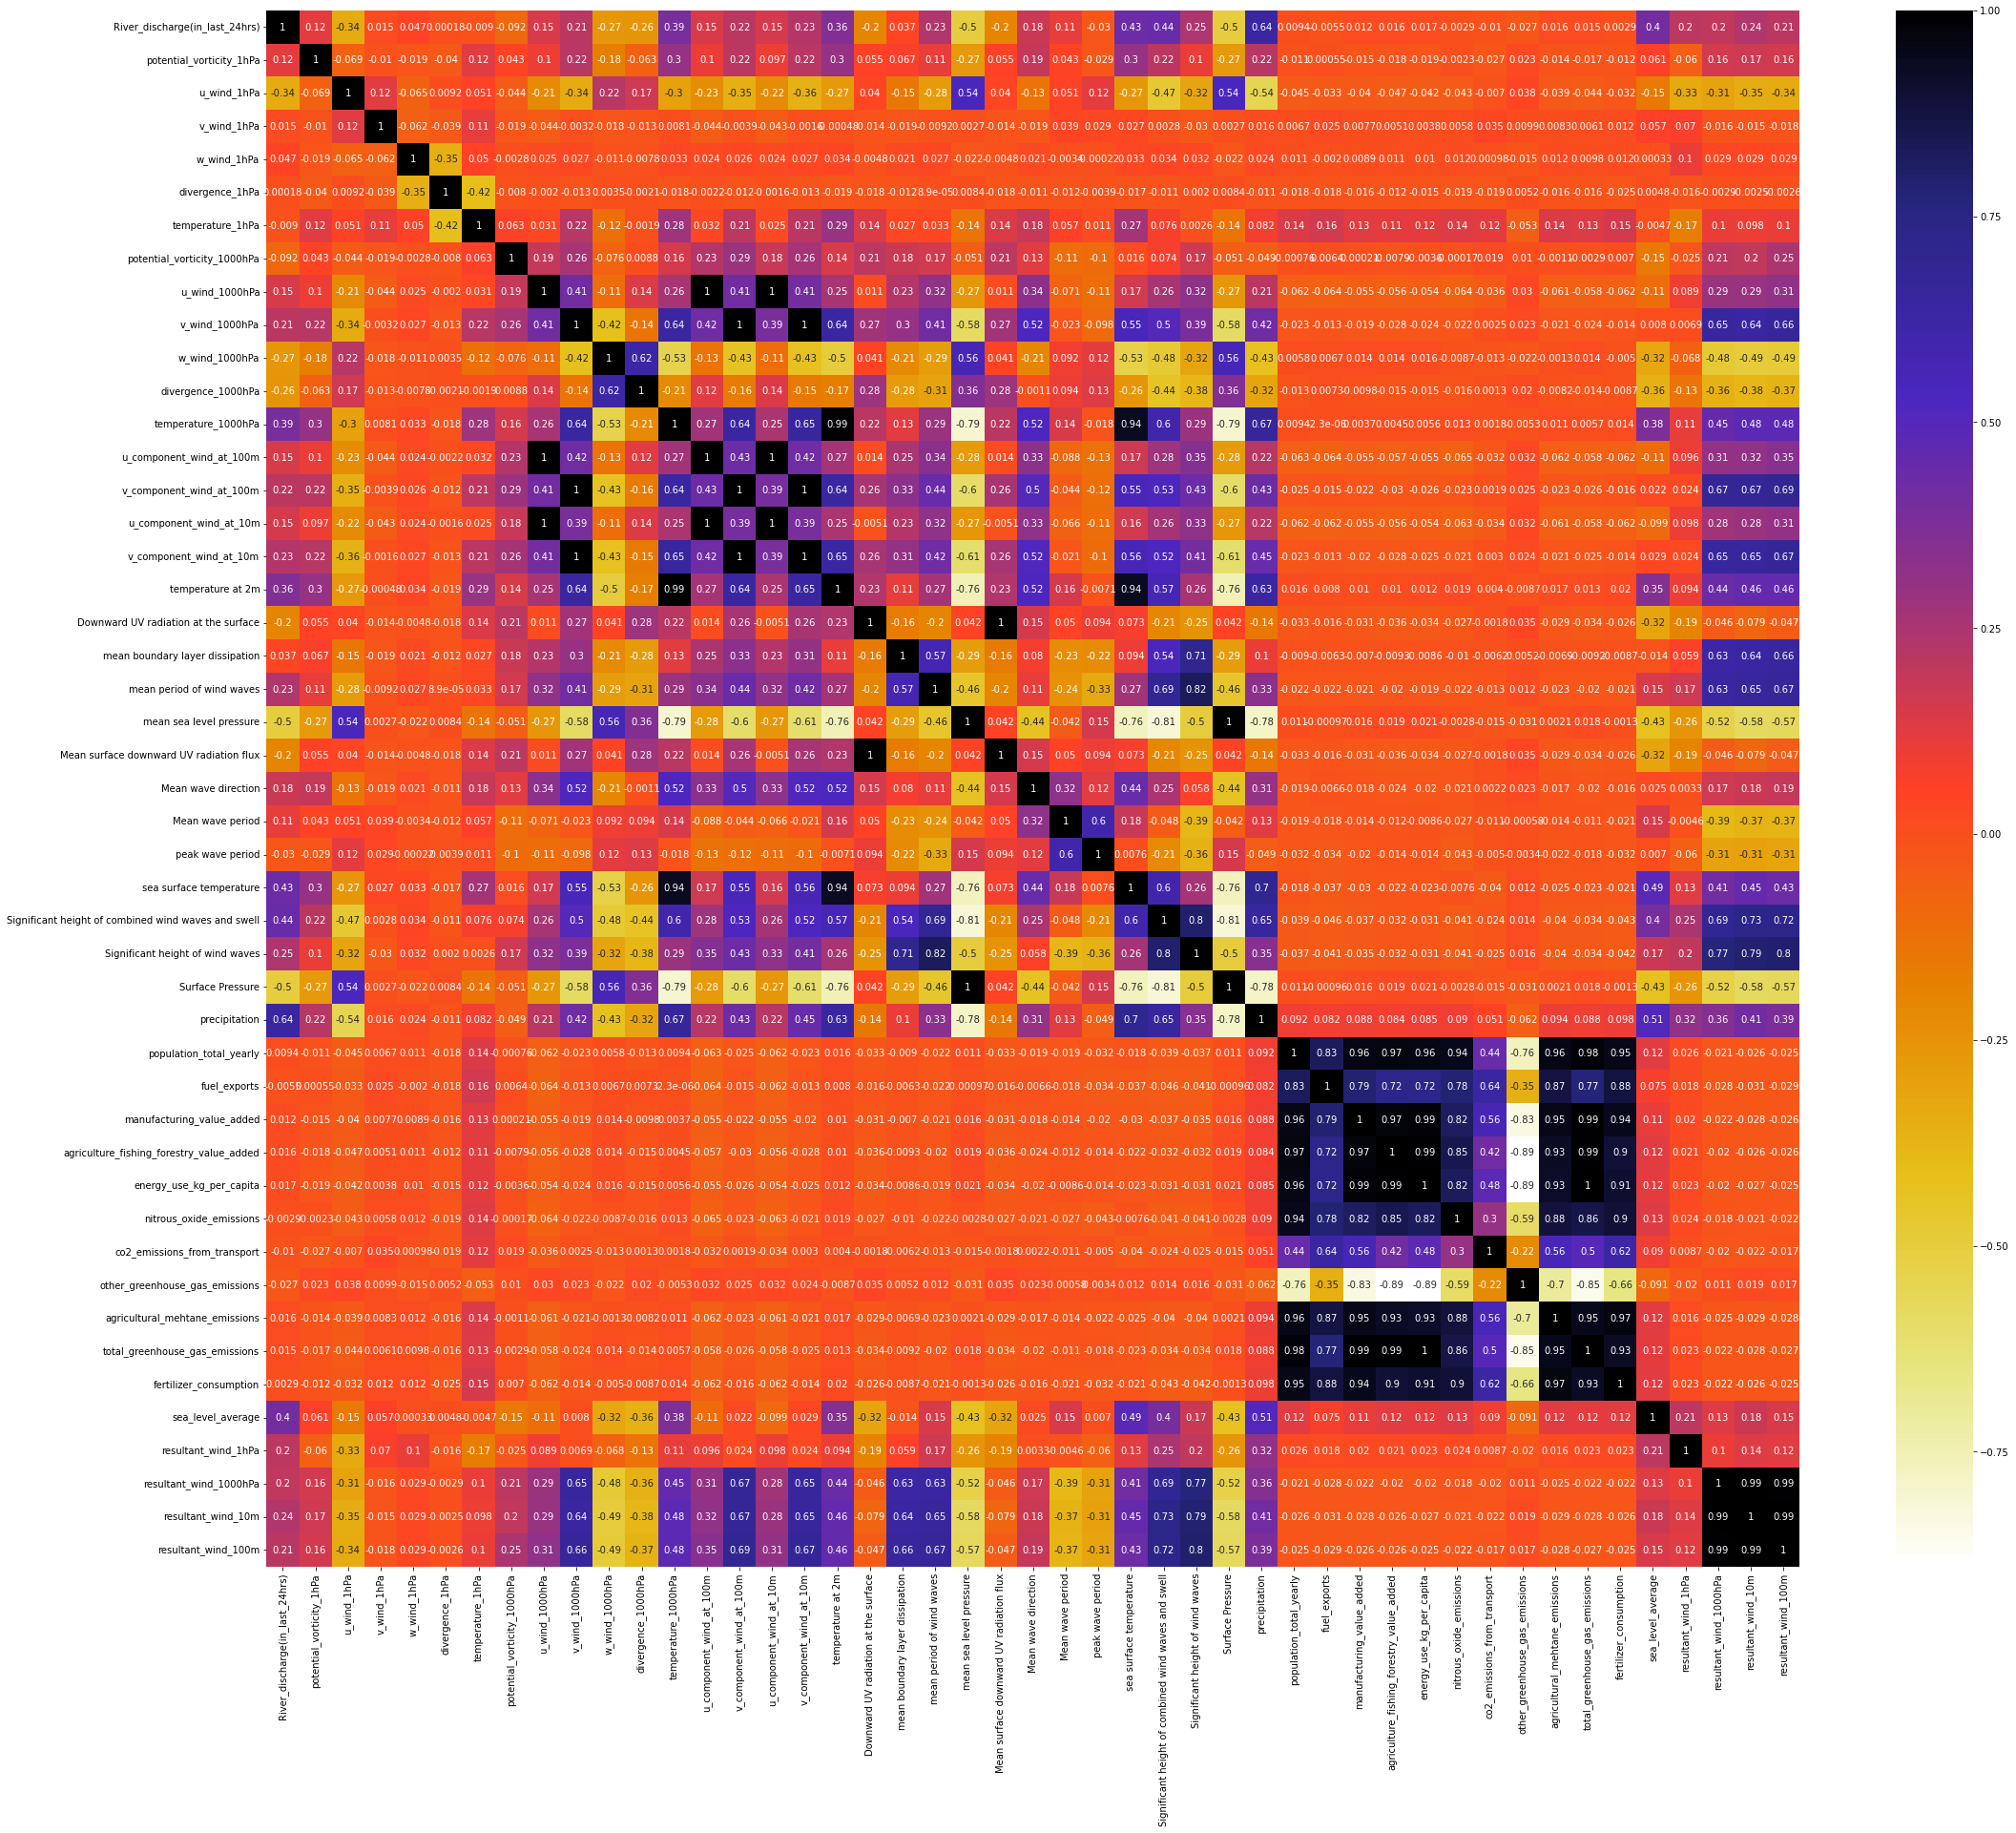

In [7]:
#using Heatmap to find correlation
plt.figure(figsize = (12*3,10*3))
cor = scaled_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.savefig('books_read.png')

In [8]:
import networkx as nx
abs_corr = df.corr().abs()
# Select the upper triangle of the correlation matrix (excluding the diagonal)
upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))

# Set the correlation threshold
threshold = 0.9

#Create a graph
G = nx.Graph()

# Add edges between highly correlated columns
for column in upper_tri.columns:
    for row_index, value in upper_tri[column].items():
        if value > threshold:
            # Ensure consistent order (alphabetical) for edges
            node1, node2 = sorted([row_index, column])
            G.add_edge(node1, node2)


# Find all connected components
connected_components = list(nx.connected_components(G))

# Create the dictionary
correlated_groups_dict = {}

for component in connected_components:
    component_list = sorted(list(component)) # Ensure consistent order for component members

    if not component_list: # Handle empty components (shouldn't happen with valid nodes)
        continue

    # Pick the first column (alphabetically) as the key
    key_column = component_list[0] 
    
    # The rest of the columns in the component are the values
    # If the component has only one node (key_column), the value will be an empty list
    correlated_columns = component_list[1:]

    correlated_groups_dict[key_column] = correlated_columns

print("\nConnected Components Dictionary (Key: Representative Column, Value: Correlated Columns):")
for key, value in correlated_groups_dict.items():
    print(f"'{key}': {value}")



Connected Components Dictionary (Key: Representative Column, Value: Correlated Columns):
'u_component_wind_at_100m': ['u_component_wind_at_10m', 'u_wind_1000hPa']
'v_component_wind_at_100m': ['v_component_wind_at_10m', 'v_wind_1000hPa']
'sea surface temperature': ['temperature at 2m', 'temperature_1000hPa']
'Downward UV radiation at the surface': ['Mean surface downward UV radiation flux']
'Surface Pressure': ['mean sea level pressure']
'agricultural_mehtane_emissions': ['agriculture_fishing_forestry_value_added', 'energy_use_kg_per_capita', 'fertilizer_consumption', 'manufacturing_value_added', 'nitrous_oxide_emissions', 'population_total_yearly', 'total_greenhouse_gas_emissions']
'resultant_wind_1000hPa': ['resultant_wind_100m', 'resultant_wind_10m']


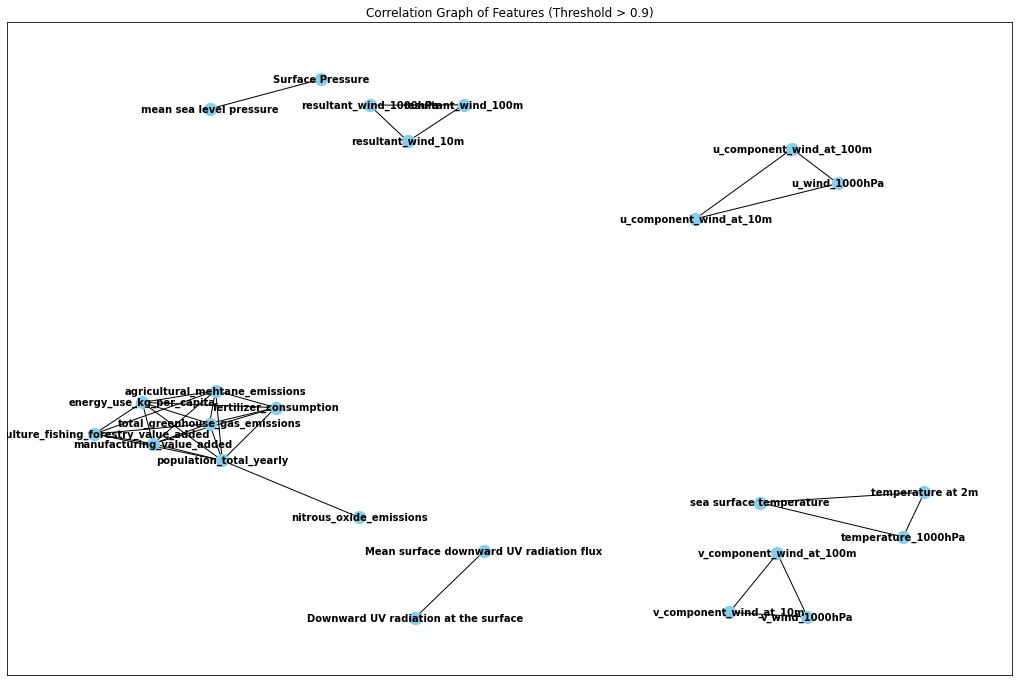

In [9]:
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50) # Layout for better visualization
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=150, font_size=10, font_weight='bold')
plt.title("Correlation Graph of Features (Threshold > 0.9)")
plt.show()

In [10]:
for key, value in correlated_groups_dict.items():
    scaled_df.drop(value, axis = 1, inplace = True)

In [11]:
scaled_df

,River_discharge(in_last_24hrs),potential_vorticity_1hPa,u_wind_1hPa,v_wind_1hPa,w_wind_1hPa,divergence_1hPa,temperature_1hPa,potential_vorticity_1000hPa,w_wind_1000hPa,divergence_1000hPa,...,Significant height of wind waves,Surface Pressure,precipitation,fuel_exports,co2_emissions_from_transport,other_greenhouse_gas_emissions,agricultural_mehtane_emissions,sea_level_average,resultant_wind_1hPa,resultant_wind_1000hPa
0,-0.071330,0.182523,-0.073511,-1.042288,0.491092,0.258761,-0.888381,-0.057325,2.155691,0.839283,...,-0.244286,1.085930,-0.350362,-0.624605,0.527138,0.509749,-1.100376,-0.276237,-0.554374,-0.394687
1,-0.072509,-1.482507,0.138006,2.014190,-0.337256,0.047949,-0.848491,-0.019108,1.028914,-0.051038,...,-0.373076,0.987368,-0.359944,-0.624731,0.525414,0.509431,-1.100084,-0.367691,0.096106,-0.640415
2,-0.073688,-1.246447,0.114520,-0.528746,-0.974426,0.999321,-1.040543,0.127389,1.238952,0.355716,...,-0.316028,0.918298,-0.369525,-0.624857,0.523690,0.509113,-1.099791,-0.456897,-0.973483,-0.623395
3,-0.074867,-1.355175,0.287792,1.515063,-0.917888,0.487232,-1.263490,0.210191,1.264868,0.584096,...,-0.565138,0.842362,-0.379106,-0.624983,0.521966,0.508795,-1.099499,-0.551349,-0.091605,-0.678217
4,-0.075653,-1.327683,0.043700,-0.669745,-0.644665,0.048221,-1.256818,2.012739,0.798375,-0.046398,...,-0.258980,0.730981,-0.374691,-0.625108,0.520242,0.508477,-1.099207,-0.597451,-0.827867,-0.207289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,-0.011987,1.450881,0.981531,0.737767,-0.321215,-0.467400,0.240717,-0.025478,0.690069,0.210336,...,0.633644,0.903965,-0.363182,-0.073525,-0.258559,-4.829777,0.649525,0.000750,0.614709,0.160348
10216,-0.013559,0.304274,0.011125,-2.127485,-0.260206,0.720321,-0.137874,-0.471338,-0.466493,-0.909911,...,0.753905,0.831185,-0.366956,-0.074305,-0.259035,-4.831186,0.649649,-0.002999,-0.234575,0.349365
10217,-0.015917,0.056845,-0.663201,-1.860127,-1.033857,0.197093,0.839353,-0.464968,0.323760,0.136616,...,0.012254,0.628276,-0.370730,-0.075086,-0.259511,-4.832595,0.649772,0.027361,0.586462,-0.016509
10218,-0.018275,-1.971578,-0.577474,-0.404189,-0.926566,0.756724,-0.196475,-0.050955,0.803017,0.297977,...,-0.290093,0.595073,-0.374504,-0.075866,-0.259987,-4.834005,0.649896,0.076462,0.297002,-0.583230


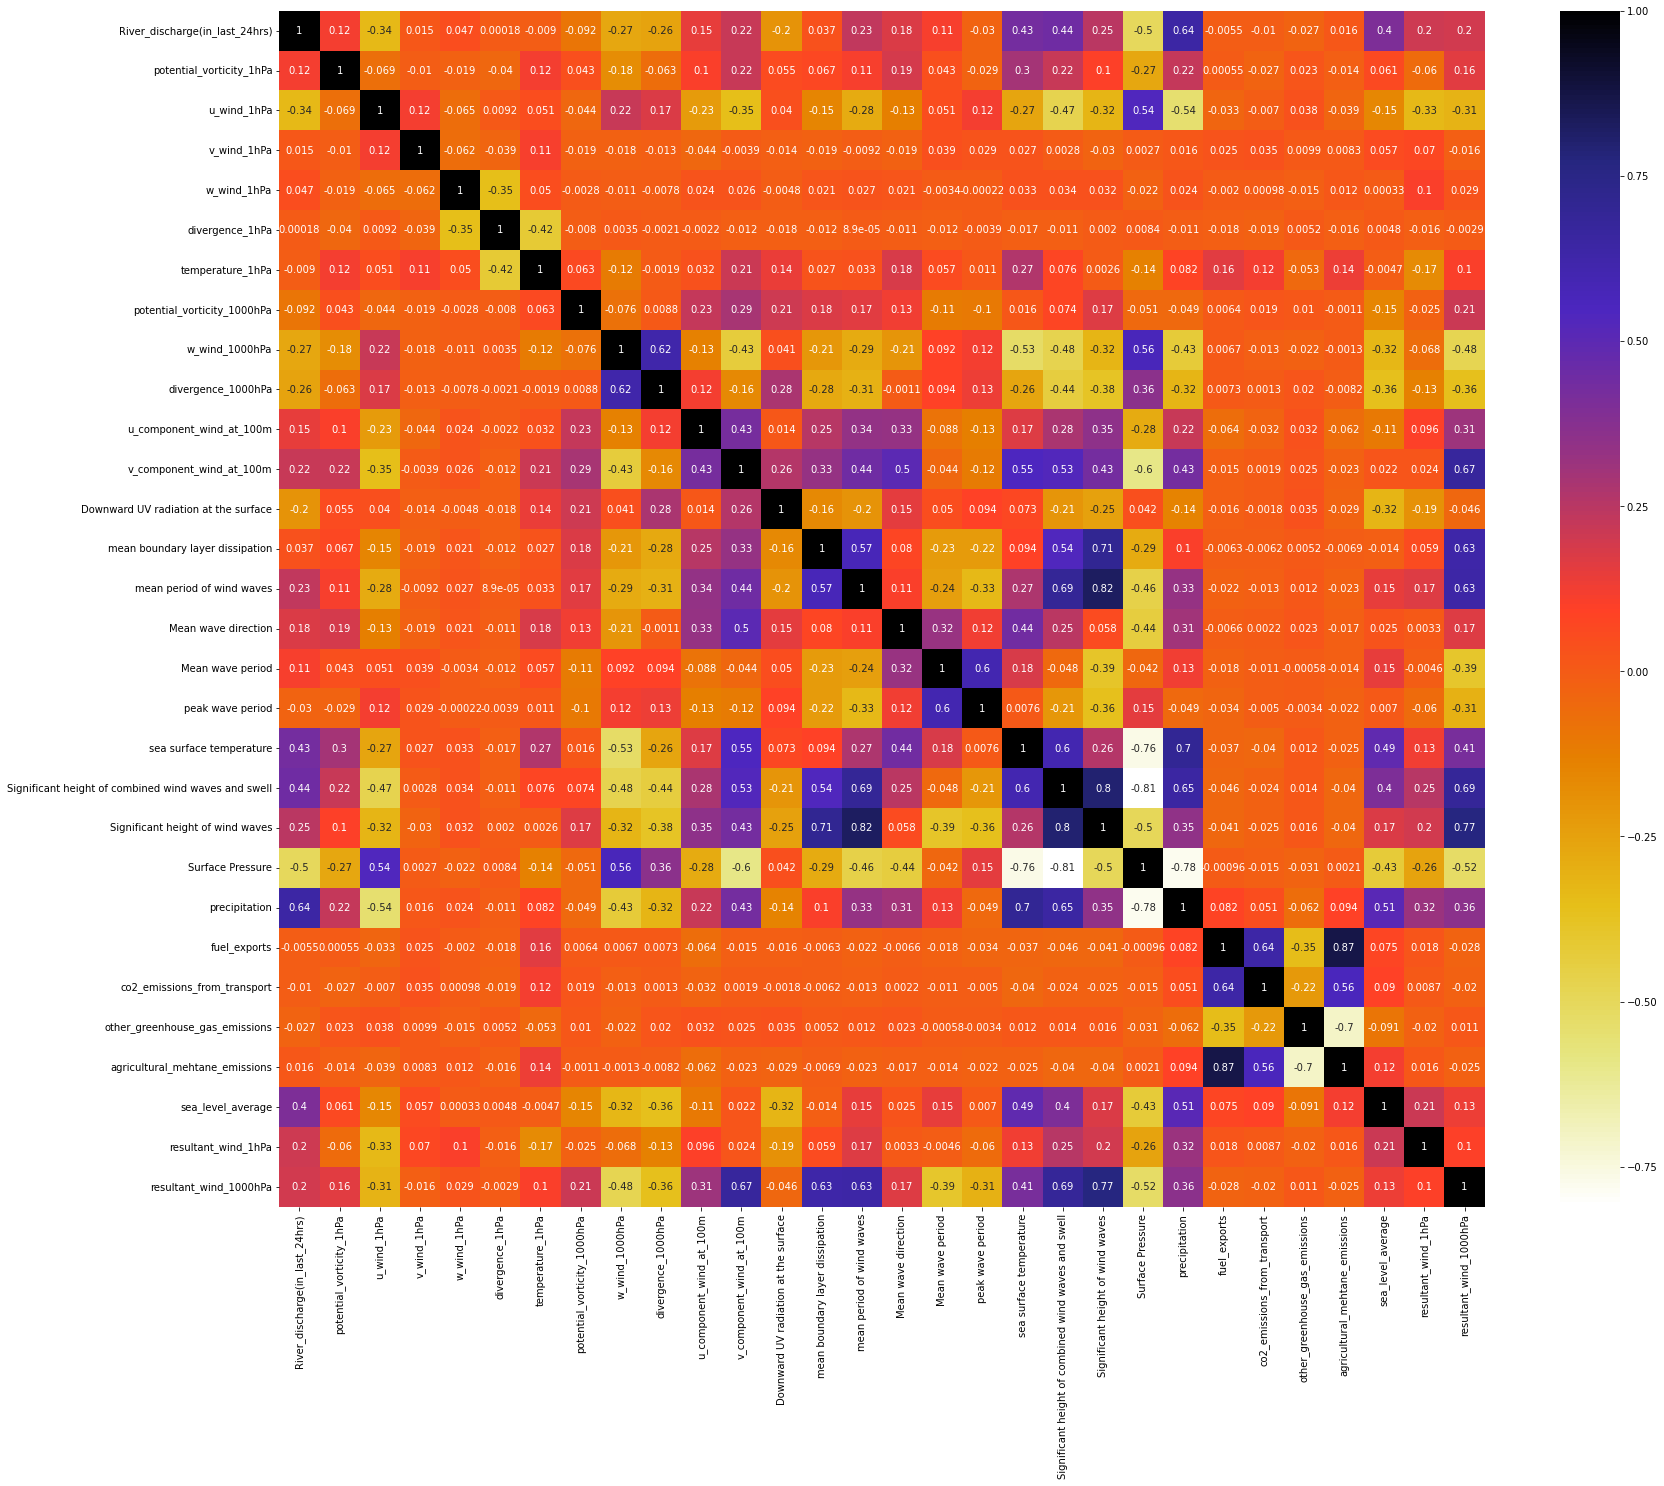

In [12]:
#using Heatmap to find correlation
plt.figure(figsize = (27,22))
cor = scaled_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.savefig('books_read.png')

In [13]:
from sklearn.model_selection import train_test_split
x = scaled_df.iloc[:, 0:27]
#y is the sea level average
y = scaled_df.iloc[:, 27]
x = pd.concat([x, scaled_df.iloc[:, 28:30]], axis = 'columns')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# HETEROSCEDACITY - WHITE'S TEST AND BREUSCH PAGAN TEST

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson


scaled_df.columns = scaled_df.columns.str.replace(" ", "_")
scaled_df.columns = scaled_df.columns.str.replace("(", "_")
scaled_df.columns = scaled_df.columns.str.replace(")", "_")

f = ''
f += 'sea_level_average ~'
for col in scaled_df.columns:
    f+=col
    f+=' + '
f1 = f[:-3]
f1 = f1.replace('sea_level_average + ', '')
#fit multiple linear regression model
model = ols(f1, data=scaled_df).fit()

#view model summary
print(model.summary())

#perform Durbin-Watson test for autocorrelation
durbin_watson(model.resid)

                            OLS Regression Results                            
Dep. Variable:      sea_level_average   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     382.0
Date:                Mon, 18 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:27:00   Log-Likelihood:                -6221.7
No. Observations:               10220   AIC:                         1.250e+04
Df Residuals:                   10190   BIC:                         1.272e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

C:\Users\Amber\AppData\Local\Temp\ipykernel_13316\1529631126.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  scaled_df.columns = scaled_df.columns.str.replace("(", "_")
C:\Users\Amber\AppData\Local\Temp\ipykernel_13316\1529631126.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  scaled_df.columns = scaled_df.columns.str.replace(")", "_")


0.21857322212426827

In [15]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 
         'p-value',
        'f-value', 
        'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 757.2054808467269),
 ('p-value', 1.0780950885974723e-140),
 ('f-value', 28.117099986765204),
 ('f p-value', 1.3009915193075807e-146)]

In [ ]:
# Durbin-Watson TEST
# Durbin-Watson test statistic is 0.2 which means that there is a strong positive autocorrelation in the residuals.

# Bresuch-Pagan TEST
# Using simple OLS, the p-value is 0 which is less than 0.05, indicating that we reject the null hypothesis of homoscedasticity.
# This suggests that the variance of the errors is not constant across observations, indicating heteroscedasticity.
# Switching to ARIMA to address the autocorrelation and heteroscedasticity issues.

### Using ARIMA for breusch pagan test

#### Performing Dickey-fuller test first

In [17]:
# The Dickey-Fuller Test is a hypothesis test for stationarity. It evaluates whether the time series has a unit root, which implies that the series is non-stationary. Everyone uses the Augmented version, so we will focus on that.
# Null Hypothesis (H₀): The time series is not stationary.
# Alternative Hypothesis (H₁): The time series is stationary.

# If the p-value from the test is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis

In [18]:
from statsmodels.tsa.stattools import adfuller
op = []
for col in scaled_df.columns:
    dftest = adfuller(scaled_df[col], autolag = "AIC")
    dfoutput = {}
    dfoutput['Test statistics'] = dftest[0]
    dfoutput['p-value'] = dftest[1]
    dfoutput['no. of lags used'] = dftest[2]
    dfoutput['number of observations used'] = dftest[3]
    # for key,value in dftest[4].items():
    #     dfoutput['critical value (%s)'%key] = value

    print(col)
    print(dfoutput)
    op.append(dfoutput)

River_discharge_in_last_24hrs_
{'Test statistics': -12.550687821050364, 'p-value': 2.2094229843708254e-23, 'no. of lags used': 9, 'number of observations used': 10210}
potential_vorticity_1hPa
{'Test statistics': -15.196389889927637, 'p-value': 5.912535331732189e-28, 'no. of lags used': 17, 'number of observations used': 10202}
u_wind_1hPa
{'Test statistics': -10.108020024897781, 'p-value': 1.0176938474945125e-17, 'no. of lags used': 30, 'number of observations used': 10189}
v_wind_1hPa
{'Test statistics': -16.321785123723824, 'p-value': 3.122437220727768e-29, 'no. of lags used': 37, 'number of observations used': 10182}
w_wind_1hPa
{'Test statistics': -18.096628447424823, 'p-value': 2.560816772879255e-30, 'no. of lags used': 22, 'number of observations used': 10197}
divergence_1hPa
{'Test statistics': -16.703095669342616, 'p-value': 1.4556367730799506e-29, 'no. of lags used': 37, 'number of observations used': 10182}
temperature_1hPa
{'Test statistics': -12.55432793951863, 'p-value': 

In [19]:
# p-value is less than 0.05 for all the columns except the follwoing columns:
# fuel_exports
# co2_emissions_from_transport
# other_greenhouse_gas_emissions
# agricultural_mehtane_emissions

# Therefore, we will have to use differencing for these columns to make them stationary.

In [20]:
backup = scaled_df.copy()

scaled_df['fuel_exports'] = scaled_df['fuel_exports'].diff()
scaled_df['co2_emissions_from_transport'] = scaled_df['co2_emissions_from_transport'].diff()
scaled_df['other_greenhouse_gas_emissions'] = scaled_df['other_greenhouse_gas_emissions'].diff()
scaled_df['agricultural_mehtane_emissions'] = scaled_df['agricultural_mehtane_emissions'].diff()

scaled_df.dropna(inplace=True)
print(adfuller(scaled_df['fuel_exports'], autolag = "AIC"))
print(adfuller(scaled_df['co2_emissions_from_transport'], autolag = "AIC"))
print(adfuller(scaled_df['other_greenhouse_gas_emissions'], autolag = "AIC"))
print(adfuller(scaled_df['agricultural_mehtane_emissions'], autolag = "AIC"))

(-3.1561557551728128, 0.02266700875266266, 0, 10218, {'1%': -3.430990139317678, '5%': -2.86182290416425, '10%': -2.5669205847432988}, -180241.50430884206)
(-3.595966278714542, 0.005838613752897342, 0, 10218, {'1%': -3.430990139317678, '5%': -2.86182290416425, '10%': -2.5669205847432988}, -163773.35730331793)
(-3.470618771155452, 0.008774517439558278, 0, 10218, {'1%': -3.430990139317678, '5%': -2.86182290416425, '10%': -2.5669205847432988}, -161312.94463199622)
(-3.665989453099512, 0.004617787195110731, 0, 10218, {'1%': -3.430990139317678, '5%': -2.86182290416425, '10%': -2.5669205847432988}, -185920.83316227014)


In [21]:
#scaled_df
# Now that we have taken care of the stationarity, we can proceed with ARIMA modeling.

##### ARIMA MODEL

In [22]:
# I have already performed differenceing on the columns that were not stationary. 
# Therefore, the d value will be 0.as_integer_ratio

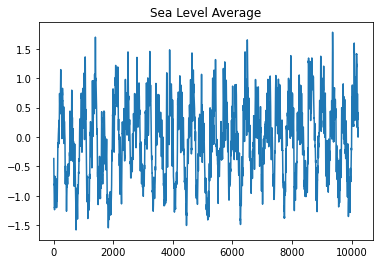

In [23]:
series = scaled_df['sea_level_average']
series.plot(title='Sea Level Average')
plt.show()

c:\Users\Amber\anaconda3\envs\MTP\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


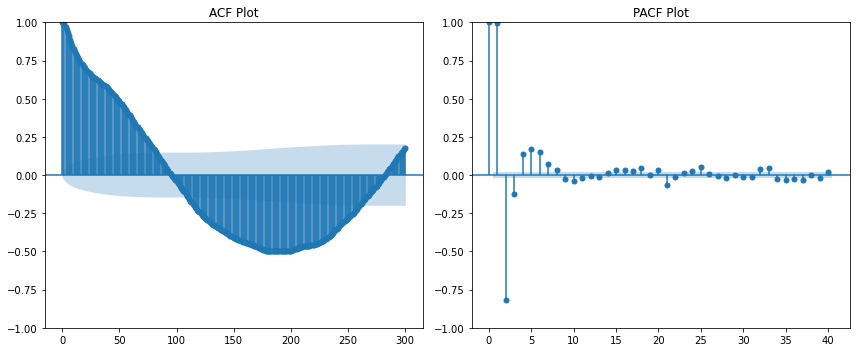

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = scaled_df['sea_level_average']

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(series, ax=plt.gca(), lags=300)
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(series, ax=plt.gca(), lags=40)
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

# - p: Number of significant lags in PACF before it drops off (cuts off).
# - q: Number of significant lags in ACF before it drops off (cuts off).
# Choose p and q based on where the plots drop to near zero.

In [25]:
# Choosing p = 7 and q = 100
from statsmodels.tsa.arima.model import ARIMA

# Example: let's say you found p=1, d=1, q=1
p, d, q = 7, 0, 100  # Replace with your values from ACF/PACF
model = ARIMA(scaled_df['sea_level_average'], order=(p, d, q))
arima_result = model.fit()
print(arima_result.summary())

c:\Users\Amber\anaconda3\envs\MTP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Amber\anaconda3\envs\MTP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Amber\anaconda3\envs\MTP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [26]:
# Since ARIMA is a univariate model,
# We will use SARIMAX instead. It takes in exogenous variables(independent variables) as well.


#### SARIMAX MODEL

In [41]:
from statsmodels.tsa.stattools import adfuller
scaled_df_small = scaled_df.iloc[::7, :].reset_index(drop=True)
# Downsample to reduce computation time

series = scaled_df_small['sea_level_average']
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

d = 0
while result[1] > 0.05:
    series = series.diff().dropna()
    d += 1
    result = adfuller(series)
    print(f'After differencing {d} times: p-value = {result[1]}')

print(f'Optimal d (number of differences): {d}')

ADF Statistic: -11.895162123452373
p-value: 5.745072239503004e-22
Optimal d (number of differences): 0


###### Selecting p and q values

c:\Users\Amber\anaconda3\envs\MTP\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


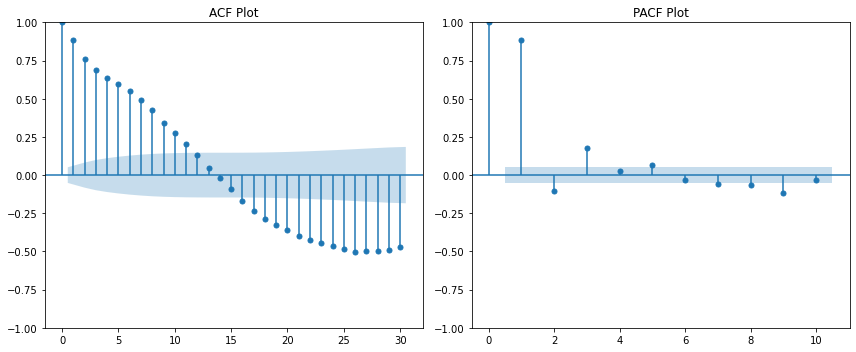

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(series, ax=plt.gca(), lags=30)
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(series, ax=plt.gca(), lags=10)
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

# p: Number of significant lags in PACF before it drops off
# q: Number of significant lags in ACF before it drops off

,River_discharge_in_last_24hrs_,potential_vorticity_1hPa,u_wind_1hPa,v_wind_1hPa,w_wind_1hPa,divergence_1hPa,temperature_1hPa,potential_vorticity_1000hPa,w_wind_1000hPa,divergence_1000hPa,...,Significant_height_of_wind_waves,Surface_Pressure,precipitation,fuel_exports,co2_emissions_from_transport,other_greenhouse_gas_emissions,agricultural_mehtane_emissions,sea_level_average,resultant_wind_1hPa,resultant_wind_1000hPa
0,-0.072509,-1.482507,0.138006,2.014190,-0.337256,0.047949,-0.848491,-0.019108,1.028914,-0.051038,...,-0.373076,0.987368,-0.359944,-0.000126,-0.001724,-0.000318,0.000292,-0.367691,0.096106,-0.640415
1,-0.079583,-1.287789,-0.388206,-0.406667,-0.229176,-0.561125,-0.518784,0.114650,-0.596074,-0.847016,...,-0.260536,0.614347,-0.357029,-0.000126,-0.001724,-0.000318,0.000292,-0.672039,-0.052853,0.554544
2,-0.086657,-1.122216,-0.026103,0.089082,1.346000,-1.142217,-1.370685,0.025478,0.623151,0.313442,...,-0.414912,0.626746,-0.326120,-0.000126,-0.001724,-0.000318,0.000292,-1.115442,-0.633999,-0.602855
3,-0.067007,-0.880988,-0.581982,-0.283687,-0.584445,0.357104,-0.852263,-0.101911,0.131515,-0.072690,...,-0.109272,0.870243,-0.295212,-0.000126,-0.001724,-0.000318,0.000292,-1.203898,0.307507,-0.608993
4,-0.083513,-1.631130,-0.916673,0.277831,0.284136,0.580413,-0.968741,-0.063694,1.882990,0.626369,...,-0.387771,0.812661,-0.264303,-0.000126,-0.001724,-0.000318,0.000292,-1.214768,0.952581,-0.643772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.202201,-1.474652,1.149931,-1.085759,0.197094,0.633388,0.421889,0.031847,1.651291,0.996005,...,-0.565138,0.371621,-0.220307,-0.000780,-0.000476,-0.001409,0.000123,0.200525,0.854548,-0.417064
1456,0.077225,-1.748747,0.503599,0.451489,-0.064033,-1.021597,-0.052147,0.012739,-0.458756,-0.742879,...,0.724347,0.763773,-0.280154,-0.000780,-0.000476,-0.001409,0.000123,0.674663,-0.243637,0.840857
1457,0.036353,-2.143352,0.894496,0.400586,-0.110578,-0.616816,-0.755802,0.019108,0.494343,0.378915,...,-0.475111,0.447754,-0.306572,-0.000780,-0.000476,-0.001409,0.000123,0.420915,0.414830,-0.879303
1458,0.010022,-0.265826,0.329964,0.130525,-0.766682,-0.586933,0.019945,-0.031847,0.333043,-0.102591,...,-0.388468,0.563127,-0.332990,-0.000780,-0.000476,-0.001409,0.000123,0.416417,-0.591276,-0.652222


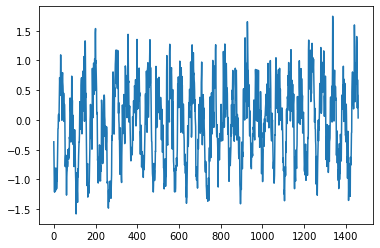

In [44]:
plt.plot(scaled_df_small['sea_level_average'])
scaled_df_small

In [45]:
import statsmodels.api as sm

# endog is the dependent variable (sea level average)
# exog are the independent variables (all other columns except sea_level_average)
endog = scaled_df_small['sea_level_average']
exog = scaled_df_small.drop('sea_level_average', axis=1)

p, d, q = 2, 0, 12 
model = sm.tsa.SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(1,0,1,52))
results = model.fit()
print(results.summary())

c:\Users\Amber\anaconda3\envs\MTP\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:                     sea_level_average   No. Observations:                 1460
Model:             SARIMAX(2, 0, 12)x(1, 0, [1], 52)   Log Likelihood                -170.256
Date:                               Mon, 18 Aug 2025   AIC                            432.512
Time:                                       13:15:59   BIC                            675.677
Sample:                                            0   HQIC                           523.223
                                              - 1460                                         
Covariance Type:                                 opg                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
River_di

In [46]:
# The data follows a seasonal pattern, so we can use SARIMAX with seasonal_order=(0,0,0,365) to account for yearly seasonality.

import statsmodels.stats.api as sms

residuals = results.resid
fitted = results.fittedvalues
import statsmodels.api as sm
exog_bp = sm.add_constant(fitted)
bp_test = sms.het_breuschpagan(residuals, exog_bp)
print('Breusch-Pagan test statistic:', bp_test[0])
print('p-value:', bp_test[1])

Breusch-Pagan test statistic: 16.209957893636524
p-value: 5.669531158140465e-05


In [47]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_stat)

Durbin-Watson statistic: 1.9977388466246466


In [ ]:
# p value for Breusch-Pagan test is significantly less than 0.05, indicating heteroscedasticity.
# Durbin-Watson test statistic is very close to 2, indicating no autocorrelation in the residuals.

**Breusch-Pagan test** result (`p-value ≈ 0.000057`) indicates **strong evidence of heteroscedasticity** (non-constant variance of residuals) in the SARIMAX model.  

This is a concern for linear regression, but **tree-based models like XGBoost are robust to heteroscedasticity** and do not require homoscedastic errors.

---

#### Should You Be Concerned Before Fitting XGBoost?

- **No, you do not need to worry about heteroscedasticity for XGBoost.**
- XGBoost does not assume constant variance of errors and is not affected by this issue.
- You can proceed to fit XGBoost and interpret feature importance.

---

#### Best Practices Before Finding Most Important Feature

1. **Remove Highly Correlated Features:**  
   You already did this with your correlation/network analysis. This helps avoid redundancy and multicollinearity.

2. **Standardize/Normalize Data:**  
   You already used `RobustScaler`. XGBoost does not require scaling, but it doesn't hurt.

3. **Check for Data Leakage:**  
   Ensure your features do not include information from the future or target variable.

4. **Split Data:**  
   Use a train-test split to avoid overfitting and to validate feature importance.

---

#### Ways to Find the Most Important Feature (with Rationale)

##### 1. **XGBoost Built-in Feature Importance**
- **Rationale:** XGBoost provides several ways to measure feature importance, such as:
  - **Gain:** Improvement in accuracy brought by a feature to the branches it is on.
  - **Weight:** Number of times a feature is used to split the data.
  - **Cover:** Number of samples affected by splits on this feature.
- **Gain** is most commonly used and recommended.



In [49]:
#Therefore, we will proceed with XGBoost for feature importance analysis since it is robust to heteroscedasticity.

#### XGBoost

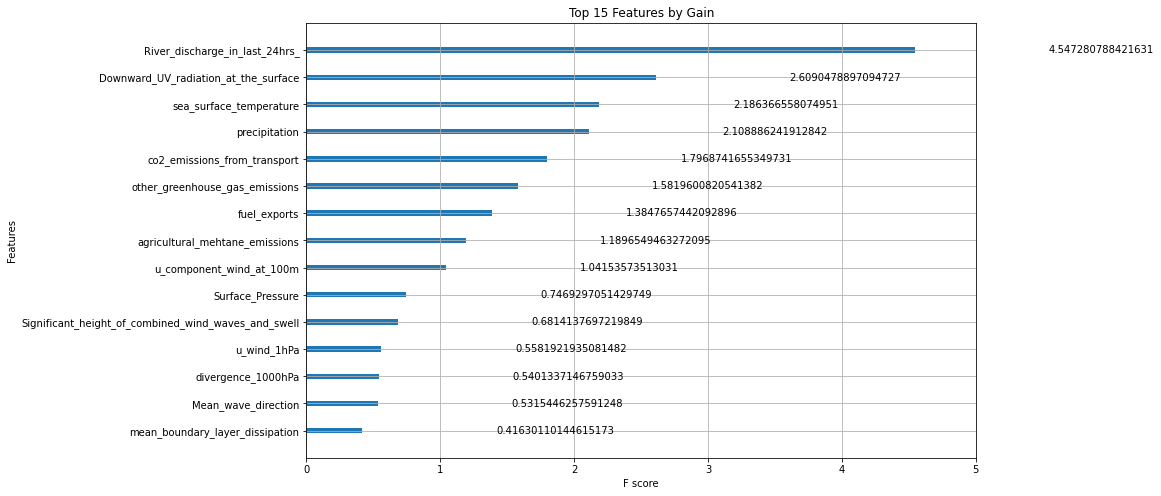

Most important feature by gain: River_discharge_in_last_24hrs_


In [57]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data (if not already done)
x = scaled_df.drop('sea_level_average', axis=1)
y = scaled_df['sea_level_average']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)

# Plot feature importance by 'gain'
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(xgb, ax=ax, importance_type='gain', max_num_features=15)
plt.title('Top 15 Features by Gain')
plt.show()

# Get most important feature
importances = xgb.get_booster().get_score(importance_type='gain')
most_important = max(importances, key=importances.get)
print("Most important feature by gain:", most_important)

In [58]:
predicted = xgb.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

# The R-squared (R²) or coefficient of determination is a statistical measure that 
# represents the proportion of variance in the dependent variable that is explained by the 
# independent variable(s) in a regression model. In simpler terms, it indicates how well the 
# data fits the regression line or curve. It essentially shows the "goodness of fit" of the model. 
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.06554243600868932
R-squared: 0.8467474574842243


In [69]:
print(xgb.get_params)

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='gpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)>


#### Hyper parameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = { 'learning_rate': [0.01, 0.1, 0.25, 0.5, 0.04, 0.06],
          'max_depth':[1, 2, 3, 4, 10, 15, 20, 50, 100],
          'n_estimators':[50, 70, 100, 200, 400, 800],
          'min_child_weight': [1, 3, 5, 7],
          'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
          'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7, 1]
}

random_search = RandomizedSearchCV(xgb, param_distributions = params, n_iter = 25, cv=5, n_jobs =-1, verbose = 3)
random_search.fit(x_train, y_train)

print('Train Score : ' +str( random_search.score(x_train, y_train)))
print('Test Score : '+str( random_search.score(x_test, y_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Train Score : 0.9991916582445723
Test Score : 0.8961834472139594


In [75]:
print(random_search.best_params_)

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


In [66]:
print(random_search.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device='gpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)


[00:52:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

Train Score: 0.00042328316873666987
Test Score: 0.00042440730483552235


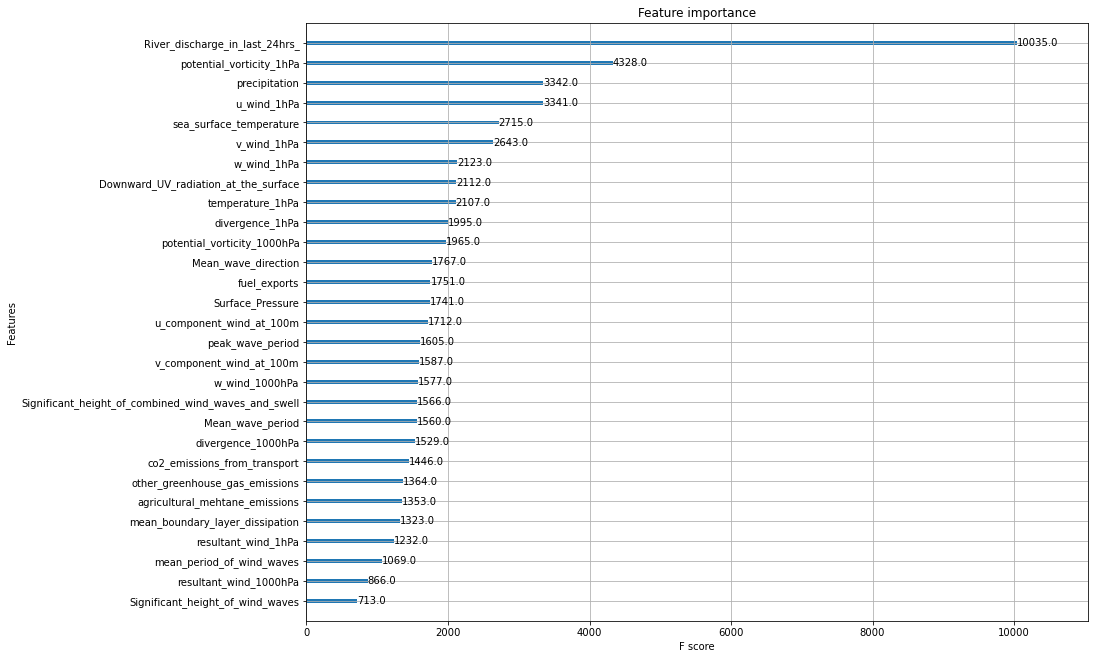

In [76]:
#Using the above parameters now
from xgboost import XGBRegressor
xgb_tuned = XGBRegressor(n_estimators= 200, max_depth= 10, learning_rate= 0.1, device = 'gpu')

xgb_tuned.fit(x, y)
print('Train Score:', mean_squared_error(xgb_tuned.predict(x_train), y_train))
print('Test Score:', mean_squared_error(xgb_tuned.predict(x_test), y_test))
#Finding most important feature
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14, 11))
plot_importance(xgb_tuned, ax = ax)
plt.savefig('most_importance_feature.png')
plt.show()

In [83]:
scaled_df.columns

Index(['River_discharge_in_last_24hrs_', 'potential_vorticity_1hPa',
       'u_wind_1hPa', 'v_wind_1hPa', 'w_wind_1hPa', 'divergence_1hPa',
       'temperature_1hPa', 'potential_vorticity_1000hPa', 'w_wind_1000hPa',
       'divergence_1000hPa', 'u_component_wind_at_100m',
       'v_component_wind_at_100m', 'Downward_UV_radiation_at_the_surface',
       'mean_boundary_layer_dissipation', 'mean_period_of_wind_waves',
       'Mean_wave_direction', 'Mean_wave_period', 'peak_wave_period',
       'sea_surface_temperature',
       'Significant_height_of_combined_wind_waves_and_swell',
       'Significant_height_of_wind_waves', 'Surface_Pressure', 'precipitation',
       'fuel_exports', 'co2_emissions_from_transport',
       'other_greenhouse_gas_emissions', 'agricultural_mehtane_emissions',
       'sea_level_average', 'resultant_wind_1hPa', 'resultant_wind_1000hPa'],
      dtype='object')

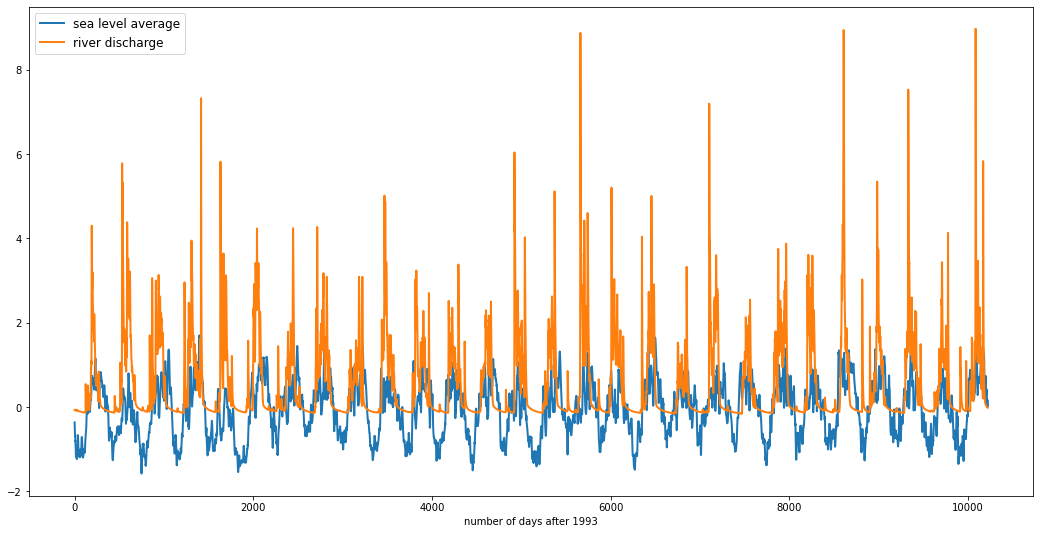

In [84]:
fig, ax = plt.subplots(figsize=(18, 9))
plt.plot( scaled_df.iloc[:,27], label = 'sea level average',linewidth = 2)
plt.plot(scaled_df.iloc[:,0], label = 'river discharge', linewidth = 2)
plt.xlabel('number of days after 1993')
plt.legend(fontsize = 'large')
plt.show()

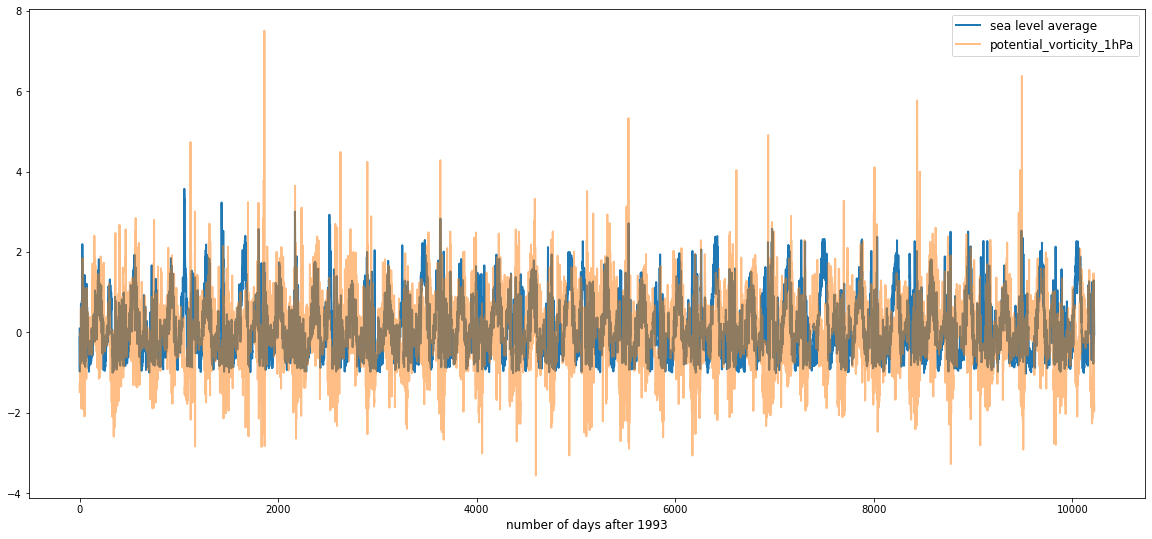

In [81]:
fig, ax = plt.subplots(figsize=(20, 9))
plt.plot(scaled_df.iloc[:,28], label = 'sea level average', linewidth = 2)
plt.plot( scaled_df.iloc[:,1], label = 'potential_vorticity_1hPa', alpha = 0.5, linewidth = 2)
plt.xlabel('number of days after 1993', fontsize = 'large')
plt.legend(fontsize = 'large')
plt.show()

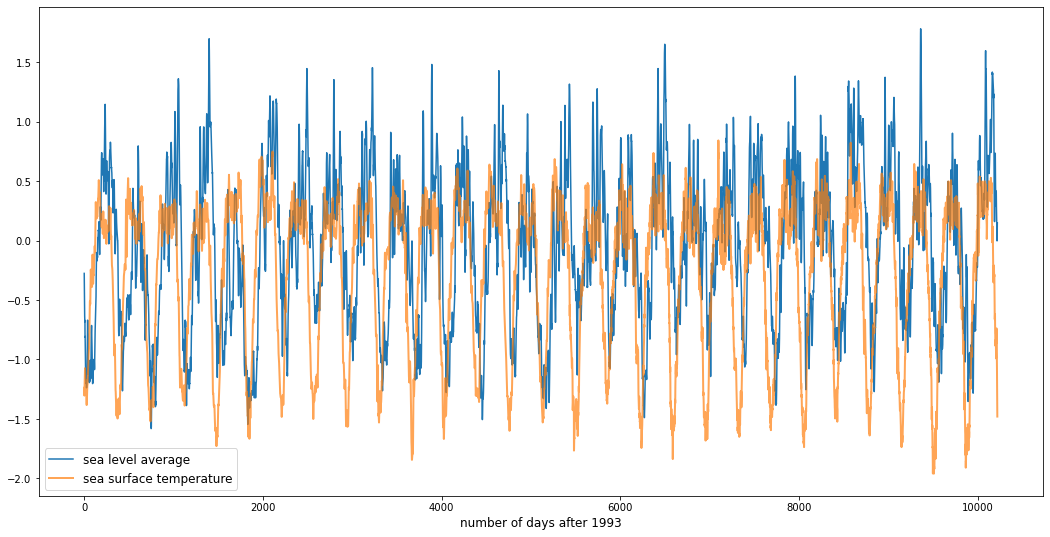

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
plt.plot(x_axis, scaled_df.iloc[:,28], label = 'sea level average')
plt.plot(x_axis, scaled_df['sea surface temperature'], label = 'sea surface temperature', alpha = 0.7, linewidth = 2)
plt.xlabel('number of days after 1993',fontsize = 'large')
plt.legend(fontsize = 'large')
plt.show()

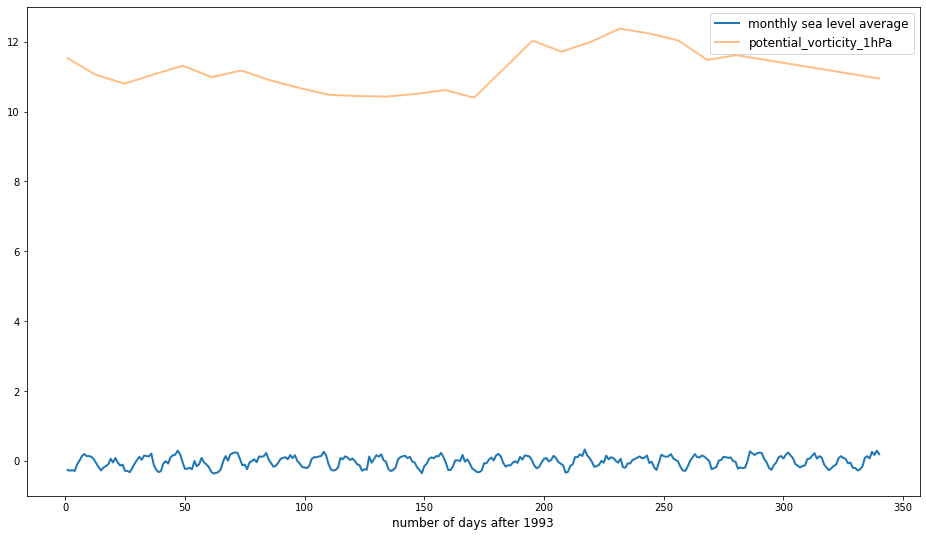

In [ ]:
x_axis_month = []
for i in range(340):
    x_axis_month.append(i+1)
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(x_axis_month, month_df.iloc[:,43], label = 'monthly sea level average', linewidth = 2)
plt.plot(x_axis_month, month_df.iloc[:,38], label = 'potential_vorticity_1hPa', alpha = 0.5, linewidth = 2)
plt.xlabel('number of days after 1993', fontsize = 'large')
plt.legend(fontsize = 'large')
plt.show()

In [ ]:
i =0
for col in month_df.columns:
    print(i,col)
    i+=1

0 year
1 River_discharge(in_last_24hrs)
2 potential_vorticity_1hPa
3 u_wind_1hPa
4 v_wind_1hPa
5 w_wind_1hPa
6 divergence_1hPa
7 temperature_1hPa
8 potential_vorticity_1000hPa
9 u_wind_1000hPa
10 v_wind_1000hPa
11 w_wind_1000hPa
12 divergence_1000hPa
13 temperature_1000hPa
14 u_component_wind_at_100m
15 v_component_wind_at_100m
16 u_component_wind_at_10m
17 v_component_wind_at_10m
18 temperature at 2m
19 Downward UV radiation at the surface
20 mean boundary layer dissipation
21 mean period of wind waves
22 mean sea level pressure
23 Mean surface downward UV radiation flux
24 Mean wave direction
25 Mean wave period
26 peak wave period
27 sea surface temperature
28 Significant height of combined wind waves and swell
29 Significant height of wind waves
30 Surface Pressure
31 precipitation
32 population_total_yearly
33 fuel_exports
34 manufacturing_value_added
35 agriculture_fishing_forestry_value_added
36 energy_use_kg_per_capita
37 nitrous_oxide_emissions
38 co2_emissions_from_transport


In [ ]:
x_axis = []
for i in range(10220):
    x_axis.append(i+1)

In [ ]:
len(df['year'])

In [ ]:
len(scaled_df)

In [ ]:
pred_tuned

array([-0.12752463,  0.337243  , -0.18834558, ..., -0.9181682 ,
        0.2848028 , -1.1248841 ], dtype=float32)

In [ ]:
pred

array([-0.04128323,  0.31317964, -0.09867314, ..., -0.9174626 ,
        0.3401964 , -1.0925975 ], dtype=float32)

In [ ]:
y_test

8769   -0.127436
4740    0.337706
590    -0.188156
33     -1.016117
8860   -0.525112
          ...   
6997   -0.607946
9912   -0.979010
3315   -0.918291
2423    0.284858
738    -1.125187
Name: sea_level_average, Length: 2044, dtype: float64

Feature: 0, Score: 0.04833
Feature: 1, Score: -0.04171
Feature: 2, Score: 0.07394
Feature: 3, Score: 0.01713
Feature: 4, Score: -0.01234
Feature: 5, Score: -0.02515
Feature: 6, Score: -0.07440
Feature: 7, Score: -0.00526
Feature: 8, Score: -0.02221
Feature: 9, Score: -0.06578
Feature: 10, Score: -0.05966
Feature: 11, Score: -0.22777
Feature: 12, Score: -0.05475
Feature: 13, Score: -0.02706
Feature: 14, Score: 0.02509
Feature: 15, Score: -0.14715
Feature: 16, Score: -0.02781
Feature: 17, Score: 0.07008
Feature: 18, Score: -0.01166
Feature: 19, Score: 0.43886
Feature: 20, Score: 0.13614
Feature: 21, Score: -0.01290
Feature: 22, Score: 0.10910
Feature: 23, Score: -0.44629
Feature: 24, Score: 0.07161
Feature: 25, Score: 0.15543
Feature: 26, Score: 0.68685
Feature: 27, Score: 0.06991
Feature: 28, Score: 0.00953
Feature: 29, Score: -1.05734
Feature: 30, Score: 0.80900
Feature: 31, Score: 0.36786


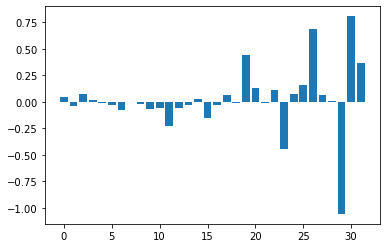

In [ ]:
#Linear Regression Featue Importance
model = LinearRegression()
model.fit(x_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
for col in x_train.columns:
    i = 0
    print(i, col)

0 River_discharge(in_last_24hrs)
0 potential_vorticity_1hPa
0 u_wind_1hPa
0 v_wind_1hPa
0 w_wind_1hPa
0 divergence_1hPa
0 temperature_1hPa
0 potential_vorticity_1000hPa
0 w_wind_1000hPa
0 divergence_1000hPa
0 u_component_wind_at_10m
0 v_component_wind_at_10m
0 mean boundary layer dissipation
0 mean period of wind waves
0 mean sea level pressure
0 Mean surface downward UV radiation flux
0 Mean wave direction
0 Mean wave period
0 peak wave period
0 sea surface temperature
0 Significant height of combined wind waves and swell
0 Significant height of wind waves
0 precipitation
0 fuel_exports
0 co2_emissions_from_transport
0 other_greenhouse_gas_emissions
0 total_greenhouse_gas_emissions
0 fertilizer_consumption
0 resultant_wind_1hPa
0 resultant_wind_1000hPa
0 resultant_wind_10m
0 resultant_wind_100m


# Finding Causal Factors now

In [ ]:
!pip install dowhy
!pip install econml

In [ ]:
import econml
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV

In [ ]:
def mapSolve(u, Zf, t, o):
  Zfc = Zf.corr()
  thr = ((Zf.corr()**2).sum().sum())**0.5/top
  tc = Zfc[t].drop([o,t]).index[abs(Zfc[t].drop([o,t]))>thr].tolist()
  oc = Zfc[o].drop([o,t]).index[abs(Zfc[o].drop([o,t]))>thr].tolist()
  coml = []
  insl = []
  for f in tc:
    if f in oc:
      coml.append(f)
    else:
      insl.append(f)
  model=CausalModel(
        data = Zf,
        treatment= t,
        outcome= o,
        common_causes=coml,
        instruments = insl,
        )
  #model.view_model(layout="dot")
  plt.show()
  identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
  dml_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y': GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), 'cv':21},
                                        'fit_params': {}
                                     })
  return(dml_estimate.value)

In [ ]:
scaled_df = scaled_df.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
Xf = scaled_df.iloc[:,list(sorted_idx)]
Zf = pd.concat([Xf, y], axis=1)
Xf

,v_wind_1hPa,w_wind_1000hPa,w_wind_1hPa,resultant_wind_1hPa,mean period of wind waves,Significant height of wind waves,divergence_1hPa,potential_vorticity_1hPa,temperature_1hPa,Mean wave period,...,fertilizer_consumption,u_component_wind_at_10m,fuel_exports,other_greenhouse_gas_emissions,co2_emissions_from_transport,total_greenhouse_gas_emissions,precipitation,sea surface temperature,Mean surface downward UV radiation flux,River_discharge(in_last_24hrs)
0,-1.042288,2.155691,0.491092,-0.554374,-0.518635,-0.244286,0.258761,0.182523,-0.888381,0.589474,...,-0.955384,-0.175787,-0.624605,0.509749,0.527138,-0.627683,-0.350362,-1.238200,-0.356709,-0.071330
1,2.014190,1.028914,-0.337256,0.096106,-0.870321,-0.373076,0.047949,-1.482507,-0.848491,0.368404,...,-0.955321,-0.321991,-0.624731,0.509431,0.525414,-0.627610,-0.359944,-1.279838,-0.342390,-0.072509
2,-0.528746,1.238952,-0.974426,-0.973483,-0.773887,-0.316028,0.999321,-1.246447,-1.040543,0.914384,...,-0.955259,0.403054,-0.624857,0.509113,0.523690,-0.627538,-0.369525,-1.303984,-0.334680,-0.073688
3,1.515063,1.264868,-0.917888,-0.091605,0.522740,-0.565138,0.487232,-1.355175,-1.263490,1.757947,...,-0.955196,0.278202,-0.624983,0.508795,0.521966,-0.627465,-0.379106,-1.276396,-0.335263,-0.074867
4,-0.669745,0.798375,-0.644665,-0.827867,-0.652580,-0.258980,0.048221,-1.327683,-1.256818,0.232046,...,-0.955134,0.802217,-0.625108,0.508477,0.520242,-0.627392,-0.374691,-1.229919,-0.311420,-0.075653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,0.737767,0.690069,-0.321215,0.614709,0.325633,0.633644,-0.467400,1.450881,0.240717,-1.442015,...,0.523373,-0.375678,-0.073525,-4.829777,-0.258559,1.204820,-0.363182,-1.072954,-0.485101,-0.011987
10216,-2.127485,-0.466493,-0.260206,-0.234575,0.537262,0.753905,0.720321,0.304274,-0.137874,-1.528974,...,0.523388,-0.273942,-0.074305,-4.831186,-0.259035,1.205020,-0.366956,-1.207476,-0.467652,-0.013559
10217,-1.860127,0.323760,-1.033857,0.586462,-0.282165,0.012254,0.197093,0.056845,0.839353,-1.325183,...,0.523403,0.025950,-0.075086,-4.832595,-0.259511,1.205220,-0.370730,-1.345028,-0.464392,-0.015917
10218,-0.404189,0.803017,-0.926566,0.297002,-0.737291,-0.290093,0.756724,-1.971578,-0.196475,-1.054350,...,0.523418,-0.067328,-0.075866,-4.834005,-0.259987,1.205419,-0.374504,-1.467117,-0.466757,-0.018275


In [ ]:
r = []
for u in range(0,top):
  r.append([Xf.columns[u], mapSolve(u, Zf, Xf.columns[u], y.columns[0])])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
y

,sea_level_average
0,-0.276237
1,-0.367691
2,-0.456897
3,-0.551349
4,-0.597451
...,...
10215,0.000750
10216,-0.002999
10217,0.027361
10218,0.076462


In [ ]:
#GRANGER TEST
df

,year,River_discharge(in_last_24hrs),potential_vorticity_1hPa,u_wind_1hPa,v_wind_1hPa,w_wind_1hPa,divergence_1hPa,temperature_1hPa,potential_vorticity_1000hPa,u_wind_1000hPa,...,co2_emissions_from_transport,other_greenhouse_gas_emissions,agricultural_mehtane_emissions,total_greenhouse_gas_emissions,fertilizer_consumption,sea_level_average,resultant_wind_1hPa,resultant_wind_1000hPa,resultant_wind_10m,resultant_wind_100m
0,1993,2.101562,0.002802,-7.816439,-5.226593,0.000297,7.053880e-06,259.246203,-1.090632e-08,-0.239269,...,11.552989,-102978.820300,440170.000000,1.313710e+06,74.701664,-0.0824,9.402871,3.028030,2.804782,3.019931
1,1993,2.078125,0.000658,-0.117806,22.208657,-0.000408,7.781033e-07,259.417241,-8.546948e-09,-0.626276,...,11.551635,-102996.626250,440179.643836,1.313797e+06,74.705706,-0.1068,22.208970,1.978900,1.845877,1.965100
2,1993,2.054688,0.000962,-0.972622,-0.616985,-0.000950,2.909997e-05,258.593771,4.972939e-10,1.720268,...,11.550281,-103014.432201,440189.287671,1.313884e+06,74.709747,-0.1306,1.151809,2.051567,1.982230,2.104176
3,1993,2.031250,0.000822,5.333959,17.728443,-0.000902,1.385533e-05,257.637825,5.609257e-09,1.333982,...,11.548927,-103032.238151,440198.931507,1.313971e+06,74.713788,-0.1558,18.513476,1.817504,1.654071,1.737014
4,1993,2.015625,0.000857,-3.550301,-1.882606,-0.000670,7.861906e-07,257.666435,1.168928e-07,3.434773,...,11.547572,-103050.044102,440208.575342,1.314058e+06,74.717830,-0.1681,4.018562,3.828118,3.238428,3.633774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,2020,3.281250,0.004435,30.584098,10.751357,-0.000394,-1.456358e-05,264.087510,-8.940176e-09,-0.784105,...,10.935903,-401894.913670,497898.863753,3.508361e+06,170.186653,-0.0085,32.418803,5.397728,4.936531,5.311426
10216,2020,3.250000,0.002959,-4.735927,-14.967420,-0.000343,2.079427e-05,262.464204,-3.646613e-08,-0.400702,...,10.935529,-401973.807036,497902.935443,3.508600e+06,170.187631,-0.0095,15.698811,6.204732,5.599524,6.118130
10217,2020,3.203125,0.002640,-29.279454,-12.567594,-0.001001,5.218054e-06,266.654323,-3.607290e-08,0.548438,...,10.935155,-402052.700402,497907.007132,3.508840e+06,170.188610,-0.0014,31.862688,4.642646,4.315522,4.664586
10218,2020,3.156250,0.000028,-26.159245,0.501047,-0.000909,2.187798e-05,262.212934,-1.051309e-08,0.183051,...,10.934781,-402131.593768,497911.078821,3.509079e+06,170.189589,0.0117,26.164043,2.223051,2.113621,2.256691


In [ ]:
month_df = df.rolling(30).mean()[0::30]
month_df

,year,River_discharge(in_last_24hrs),potential_vorticity_1hPa,u_wind_1hPa,v_wind_1hPa,w_wind_1hPa,divergence_1hPa,temperature_1hPa,potential_vorticity_1000hPa,u_wind_1000hPa,...,co2_emissions_from_transport,other_greenhouse_gas_emissions,agricultural_mehtane_emissions,total_greenhouse_gas_emissions,fertilizer_consumption,sea_level_average,resultant_wind_1hPa,resultant_wind_1000hPa,resultant_wind_10m,resultant_wind_100m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1993.0,1.925260,0.001522,-10.096212,10.341008,-0.000209,-0.000002,258.944119,-3.631599e-09,-0.079926,...,11.532000,-103254.812531,440319.479452,1.315057e+06,74.764304,-0.267937,21.982471,2.988033,2.747231,2.958242
60,1993.0,1.590104,0.001776,1.918843,9.707861,-0.000253,-0.000001,260.371197,4.020021e-08,0.383017,...,11.491376,-103788.991044,440608.794521,1.317665e+06,74.885543,-0.282197,20.037478,3.392538,2.991690,3.436158
90,1993.0,1.186979,0.002709,19.419713,5.653293,-0.000224,0.000002,263.035720,4.963767e-08,1.091376,...,11.450752,-104323.169556,440898.109589,1.320273e+06,75.006782,-0.269190,20.867563,4.443808,3.849988,4.433349
120,1993.0,0.881250,0.002355,-4.845580,3.167273,0.000121,-0.000005,265.613894,9.805714e-08,1.635348,...,11.410127,-104857.348068,441187.424658,1.322881e+06,75.128021,-0.293833,8.071062,6.726170,5.853414,7.063470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10080,2020.0,15.850000,0.002151,-52.454218,1.956105,-0.000754,0.000016,259.975488,6.933124e-09,2.878718,...,10.991798,-390100.355449,497290.146201,3.472593e+06,170.040328,0.067973,52.686284,6.603227,6.279233,7.056418
10110,2020.0,64.390625,0.002977,-19.394735,3.487385,0.000362,-0.000004,261.997820,-1.023187e-09,1.864092,...,10.980581,-392467.156430,497412.296880,3.479770e+06,170.069691,0.254853,20.777061,6.494031,6.264419,7.001804
10140,2020.0,40.066927,0.002820,1.957834,9.192313,-0.000195,-0.000002,264.909611,-3.265182e-08,-0.362097,...,10.969365,-394833.957410,497534.447560,3.486948e+06,170.099054,0.167597,10.858845,5.558837,5.262036,5.807787
10170,2020.0,28.033594,0.003052,21.315040,6.410779,0.000090,-0.000003,262.797863,-5.805434e-08,-2.478311,...,10.958149,-397200.758391,497656.598239,3.494126e+06,170.128417,0.286973,23.076312,4.631268,4.328051,4.735211


In [ ]:
month_df.dropna(inplace = True)

In [ ]:
#Standard Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
scaler.fit(month_df)
scaled = scaler.fit_transform(month_df)
scaled_df1 = pd.DataFrame(scaled, columns = df.columns)

In [ ]:
i = 0
for col in scaled_df1.columns:
    print(i,col)
    i+=1

0 year
1 River_discharge(in_last_24hrs)
2 potential_vorticity_1hPa
3 u_wind_1hPa
4 v_wind_1hPa
5 w_wind_1hPa
6 divergence_1hPa
7 temperature_1hPa
8 potential_vorticity_1000hPa
9 u_wind_1000hPa
10 v_wind_1000hPa
11 w_wind_1000hPa
12 divergence_1000hPa
13 temperature_1000hPa
14 u_component_wind_at_100m
15 v_component_wind_at_100m
16 u_component_wind_at_10m
17 v_component_wind_at_10m
18 temperature at 2m
19 Downward UV radiation at the surface
20 mean boundary layer dissipation
21 mean period of wind waves
22 mean sea level pressure
23 Mean surface downward UV radiation flux
24 Mean wave direction
25 Mean wave period
26 peak wave period
27 sea surface temperature
28 Significant height of combined wind waves and swell
29 Significant height of wind waves
30 Surface Pressure
31 precipitation
32 population_total_yearly
33 fuel_exports
34 manufacturing_value_added
35 agriculture_fishing_forestry_value_added
36 energy_use_kg_per_capita
37 nitrous_oxide_emissions
38 co2_emissions_from_transport


In [ ]:
scaled_df1.dropna(inplace=True)
# Checking if there is NaN values in the dataset
scaled_df1.isna().sum()

year                                                   0
River_discharge(in_last_24hrs)                         0
potential_vorticity_1hPa                               0
u_wind_1hPa                                            0
v_wind_1hPa                                            0
w_wind_1hPa                                            0
divergence_1hPa                                        0
temperature_1hPa                                       0
potential_vorticity_1000hPa                            0
u_wind_1000hPa                                         0
v_wind_1000hPa                                         0
w_wind_1000hPa                                         0
divergence_1000hPa                                     0
temperature_1000hPa                                    0
u_component_wind_at_100m                               0
v_component_wind_at_100m                               0
u_component_wind_at_10m                                0
v_component_wind_at_10m        

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
grangercausalitytests(month_df.iloc[:,[43,u]].pct_change().dropna(),36)[2][0]['ssr_ftest'][1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8426  , p=0.3593  , df_denom=335, df_num=1
ssr based chi2 test:   chi2=0.8501  , p=0.3565  , df=1
likelihood ratio test: chi2=0.8490  , p=0.3568  , df=1
parameter F test:         F=0.8426  , p=0.3593  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4327  , p=0.6492  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=0.8783  , p=0.6446  , df=2
likelihood ratio test: chi2=0.8772  , p=0.6449  , df=2
parameter F test:         F=0.4327  , p=0.6492  , df_denom=332, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3681  , p=0.7761  , df_denom=329, df_num=3
ssr based chi2 test:   chi2=1.1279  , p=0.7703  , df=3
likelihood ratio test: chi2=1.1260  , p=0.7708  , df=3
parameter F test:         F=0.3681  , p=0.7761  , df_denom=329, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3305  , p=0.8574  

In [ ]:
css = []
X = month_df
for u in range(1, len(X.columns)):
  p = grangercausalitytests(X.iloc[:,[43,u]].pct_change().dropna(),36)
  for cs in range(1,6):
    if p[cs][0]['ssr_ftest'][1]<0.05:
        css.append([X.columns[u], cs])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5155  , p=0.0343  , df_denom=335, df_num=1
ssr based chi2 test:   chi2=4.5559  , p=0.0328  , df=1
likelihood ratio test: chi2=4.5255  , p=0.0334  , df=1
parameter F test:         F=4.5155  , p=0.0343  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3709  , p=0.0950  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=4.8132  , p=0.0901  , df=2
likelihood ratio test: chi2=4.7792  , p=0.0917  , df=2
parameter F test:         F=2.3709  , p=0.0950  , df_denom=332, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8055  , p=0.1460  , df_denom=329, df_num=3
ssr based chi2 test:   chi2=5.5316  , p=0.1368  , df=3
likelihood ratio test: chi2=5.4866  , p=0.1394  , df=3
parameter F test:         F=1.8055  , p=0.1460  , df_denom=329, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3277  , p=0.2594  

parameter F test:         F=1.6563  , p=0.1448  , df_denom=323, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.7362  , p=0.1120  , df_denom=320, df_num=6
ssr based chi2 test:   chi2=10.8403 , p=0.0934  , df=6
likelihood ratio test: chi2=10.6676 , p=0.0992  , df=6
parameter F test:         F=1.7362  , p=0.1120  , df_denom=320, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.5124  , p=0.1622  , df_denom=317, df_num=7
ssr based chi2 test:   chi2=11.0875 , p=0.1348  , df=7
likelihood ratio test: chi2=10.9064 , p=0.1428  , df=7
parameter F test:         F=1.5124  , p=0.1622  , df_denom=317, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.3016  , p=0.2419  , df_denom=314, df_num=8
ssr based chi2 test:   chi2=10.9762 , p=0.2030  , df=8
likelihood ratio test: chi2=10.7982 , p=0.2134  , df=8
parameter F test:         F=1.3016  , p=0.2419  , df_denom=314, df_num=8

Granger Causality
nu

parameter F test:         F=1.3098  , p=0.2449  , df_denom=317, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.1644  , p=0.3203  , df_denom=314, df_num=8
ssr based chi2 test:   chi2=9.8194  , p=0.2779  , df=8
likelihood ratio test: chi2=9.6765  , p=0.2885  , df=8
parameter F test:         F=1.1644  , p=0.3203  , df_denom=314, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.0294  , p=0.4162  , df_denom=311, df_num=9
ssr based chi2 test:   chi2=9.8310  , p=0.3643  , df=9
likelihood ratio test: chi2=9.6874  , p=0.3764  , df=9
parameter F test:         F=1.0294  , p=0.4162  , df_denom=311, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9272  , p=0.5083  , df_denom=308, df_num=10
ssr based chi2 test:   chi2=9.9040  , p=0.4490  , df=10
likelihood ratio test: chi2=9.7578  , p=0.4620  , df=10
parameter F test:         F=0.9272  , p=0.5083  , df_denom=308, df_num=10

Granger Causali

ssr based F test:         F=0.0413  , p=1.0000  , df_denom=308, df_num=10
ssr based chi2 test:   chi2=0.4414  , p=1.0000  , df=10
likelihood ratio test: chi2=0.4411  , p=1.0000  , df=10
parameter F test:         F=0.0413  , p=1.0000  , df_denom=308, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=0.0379  , p=1.0000  , df_denom=305, df_num=11
ssr based chi2 test:   chi2=0.4482  , p=1.0000  , df=11
likelihood ratio test: chi2=0.4479  , p=1.0000  , df=11
parameter F test:         F=0.0379  , p=1.0000  , df_denom=305, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=0.0446  , p=1.0000  , df_denom=302, df_num=12
ssr based chi2 test:   chi2=0.5790  , p=1.0000  , df=12
likelihood ratio test: chi2=0.5785  , p=1.0000  , df=12
parameter F test:         F=0.0446  , p=1.0000  , df_denom=302, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=0.0430  , p=1.0000  , df_denom=299, df_num=13
ssr b

ssr based chi2 test:   chi2=53.9178 , p=0.0000  , df=15
likelihood ratio test: chi2=49.8744 , p=0.0000  , df=15
parameter F test:         F=3.2506  , p=0.0001  , df_denom=293, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=3.1582  , p=0.0001  , df_denom=290, df_num=16
ssr based chi2 test:   chi2=56.2813 , p=0.0000  , df=16
likelihood ratio test: chi2=51.8822 , p=0.0000  , df=16
parameter F test:         F=3.1582  , p=0.0001  , df_denom=290, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=2.9862  , p=0.0001  , df_denom=287, df_num=17
ssr based chi2 test:   chi2=56.9561 , p=0.0000  , df=17
likelihood ratio test: chi2=52.4437 , p=0.0000  , df=17
parameter F test:         F=2.9862  , p=0.0001  , df_denom=287, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=2.7923  , p=0.0002  , df_denom=284, df_num=18
ssr based chi2 test:   chi2=56.8105 , p=0.0000  , df=18
likelihood ratio test: 

likelihood ratio test: chi2=10.3785 , p=0.8870  , df=17
parameter F test:         F=0.5530  , p=0.9236  , df_denom=287, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=0.5841  , p=0.9101  , df_denom=284, df_num=18
ssr based chi2 test:   chi2=11.8826 , p=0.8532  , df=18
likelihood ratio test: chi2=11.6679 , p=0.8639  , df=18
parameter F test:         F=0.5841  , p=0.9101  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=0.5604  , p=0.9315  , df_denom=281, df_num=19
ssr based chi2 test:   chi2=12.1261 , p=0.8802  , df=19
likelihood ratio test: chi2=11.9020 , p=0.8898  , df=19
parameter F test:         F=0.5604  , p=0.9315  , df_denom=281, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=0.5301  , p=0.9527  , df_denom=278, df_num=20
ssr based chi2 test:   chi2=12.1651 , p=0.9103  , df=20
likelihood ratio test: chi2=11.9388 , p=0.9182  , df=20
parameter F test:      

likelihood ratio test: chi2=19.1626 , p=0.4465  , df=19
parameter F test:         F=0.9127  , p=0.5675  , df_denom=281, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=0.9772  , p=0.4901  , df_denom=278, df_num=20
ssr based chi2 test:   chi2=22.4266 , p=0.3178  , df=20
likelihood ratio test: chi2=21.6734 , p=0.3585  , df=20
parameter F test:         F=0.9772  , p=0.4901  , df_denom=278, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=0.9105  , p=0.5778  , df_denom=275, df_num=21
ssr based chi2 test:   chi2=22.1094 , p=0.3932  , df=21
likelihood ratio test: chi2=21.3746 , p=0.4363  , df=21
parameter F test:         F=0.9105  , p=0.5778  , df_denom=275, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=0.8951  , p=0.6017  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=22.9498 , p=0.4046  , df=22
likelihood ratio test: chi2=22.1571 , p=0.4505  , df=22
parameter F test:      

ssr based F test:         F=1.3681  , p=0.1291  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=35.0773 , p=0.0380  , df=22
likelihood ratio test: chi2=33.2688 , p=0.0582  , df=22
parameter F test:         F=1.3681  , p=0.1291  , df_denom=272, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=1.3048  , p=0.1630  , df_denom=269, df_num=23
ssr based chi2 test:   chi2=35.2528 , p=0.0491  , df=23
likelihood ratio test: chi2=33.4214 , p=0.0740  , df=23
parameter F test:         F=1.3048  , p=0.1630  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.2372  , p=0.2092  , df_denom=266, df_num=24
ssr based chi2 test:   chi2=35.1636 , p=0.0660  , df=24
likelihood ratio test: chi2=33.3358 , p=0.0972  , df=24
parameter F test:         F=1.2372  , p=0.2092  , df_denom=266, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.2139  , p=0.2260  , df_denom=263, df_num=25
ssr b

ssr based F test:         F=6.5772  , p=0.0000  , df_denom=287, df_num=17
ssr based chi2 test:   chi2=125.4476, p=0.0000  , df=17
likelihood ratio test: chi2=105.9406, p=0.0000  , df=17
parameter F test:         F=6.5772  , p=0.0000  , df_denom=287, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=6.3699  , p=0.0000  , df_denom=284, df_num=18
ssr based chi2 test:   chi2=129.5958, p=0.0000  , df=18
likelihood ratio test: chi2=108.8606, p=0.0000  , df=18
parameter F test:         F=6.3699  , p=0.0000  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=5.9681  , p=0.0000  , df_denom=281, df_num=19
ssr based chi2 test:   chi2=129.1326, p=0.0000  , df=19
likelihood ratio test: chi2=108.4791, p=0.0000  , df=19
parameter F test:         F=5.9681  , p=0.0000  , df_denom=281, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=5.6720  , p=0.0000  , df_denom=278, df_num=20
ssr b

ssr based F test:         F=0.0490  , p=1.0000  , df_denom=290, df_num=16
ssr based chi2 test:   chi2=0.8737  , p=1.0000  , df=16
likelihood ratio test: chi2=0.8725  , p=1.0000  , df=16
parameter F test:         F=0.0490  , p=1.0000  , df_denom=290, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=0.0467  , p=1.0000  , df_denom=287, df_num=17
ssr based chi2 test:   chi2=0.8903  , p=1.0000  , df=17
likelihood ratio test: chi2=0.8891  , p=1.0000  , df=17
parameter F test:         F=0.0467  , p=1.0000  , df_denom=287, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=0.0452  , p=1.0000  , df_denom=284, df_num=18
ssr based chi2 test:   chi2=0.9186  , p=1.0000  , df=18
likelihood ratio test: chi2=0.9173  , p=1.0000  , df=18
parameter F test:         F=0.0452  , p=1.0000  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=0.0427  , p=1.0000  , df_denom=281, df_num=19
ssr b

likelihood ratio test: chi2=18.1798 , p=0.4439  , df=18
parameter F test:         F=0.9194  , p=0.5554  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=0.8723  , p=0.6180  , df_denom=281, df_num=19
ssr based chi2 test:   chi2=18.8731 , p=0.4650  , df=19
likelihood ratio test: chi2=18.3375 , p=0.5000  , df=19
parameter F test:         F=0.8723  , p=0.6180  , df_denom=281, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=2.6891  , p=0.0002  , df_denom=278, df_num=20
ssr based chi2 test:   chi2=61.7129 , p=0.0000  , df=20
likelihood ratio test: chi2=56.4166 , p=0.0000  , df=20
parameter F test:         F=2.6891  , p=0.0002  , df_denom=278, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=2.5320  , p=0.0003  , df_denom=275, df_num=21
ssr based chi2 test:   chi2=61.4865 , p=0.0000  , df=21
likelihood ratio test: chi2=56.2121 , p=0.0000  , df=21
parameter F test:      

likelihood ratio test: chi2=22.3860 , p=0.2655  , df=19
parameter F test:         F=1.0717  , p=0.3800  , df_denom=281, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=1.0230  , p=0.4348  , df_denom=278, df_num=20
ssr based chi2 test:   chi2=23.4784 , p=0.2659  , df=20
likelihood ratio test: chi2=22.6546 , p=0.3061  , df=20
parameter F test:         F=1.0230  , p=0.4348  , df_denom=278, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.0721  , p=0.3780  , df_denom=275, df_num=21
ssr based chi2 test:   chi2=26.0355 , p=0.2051  , df=21
likelihood ratio test: chi2=25.0246 , p=0.2461  , df=21
parameter F test:         F=1.0721  , p=0.3780  , df_denom=275, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=1.0475  , p=0.4062  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=26.8563 , p=0.2167  , df=22
likelihood ratio test: chi2=25.7791 , p=0.2613  , df=22
parameter F test:      

likelihood ratio test: chi2=14.5434 , p=0.8451  , df=21
parameter F test:         F=0.6128  , p=0.9084  , df_denom=275, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=0.5924  , p=0.9276  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=15.1890 , p=0.8540  , df=22
likelihood ratio test: chi2=14.8363 , p=0.8692  , df=22
parameter F test:         F=0.5924  , p=0.9276  , df_denom=272, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=0.5910  , p=0.9332  , df_denom=269, df_num=23
ssr based chi2 test:   chi2=15.9685 , p=0.8566  , df=23
likelihood ratio test: chi2=15.5781 , p=0.8727  , df=23
parameter F test:         F=0.5910  , p=0.9332  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.5724  , p=0.9480  , df_denom=266, df_num=24
ssr based chi2 test:   chi2=16.2672 , p=0.8782  , df=24
likelihood ratio test: chi2=15.8611 , p=0.8930  , df=24
parameter F test:      

likelihood ratio test: chi2=34.8547 , p=0.0706  , df=24
parameter F test:         F=1.2968  , p=0.1648  , df_denom=266, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.2306  , p=0.2117  , df_denom=263, df_num=25
ssr based chi2 test:   chi2=36.7298 , p=0.0612  , df=25
likelihood ratio test: chi2=34.7356 , p=0.0931  , df=25
parameter F test:         F=1.2306  , p=0.2117  , df_denom=263, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.2708  , p=0.1767  , df_denom=260, df_num=26
ssr based chi2 test:   chi2=39.7768 , p=0.0410  , df=26
likelihood ratio test: chi2=37.4449 , p=0.0681  , df=26
parameter F test:         F=1.2708  , p=0.1767  , df_denom=260, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.2103  , p=0.2237  , df_denom=257, df_num=27
ssr based chi2 test:   chi2=39.6713 , p=0.0550  , df=27
likelihood ratio test: chi2=37.3444 , p=0.0888  , df=27
parameter F test:      

ssr based F test:         F=0.0654  , p=1.0000  , df_denom=275, df_num=21
ssr based chi2 test:   chi2=1.5878  , p=1.0000  , df=21
likelihood ratio test: chi2=1.5838  , p=1.0000  , df=21
parameter F test:         F=0.0654  , p=1.0000  , df_denom=275, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=0.0648  , p=1.0000  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=1.6606  , p=1.0000  , df=22
likelihood ratio test: chi2=1.6562  , p=1.0000  , df=22
parameter F test:         F=0.0648  , p=1.0000  , df_denom=272, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=0.0984  , p=1.0000  , df_denom=269, df_num=23
ssr based chi2 test:   chi2=2.6596  , p=1.0000  , df=23
likelihood ratio test: chi2=2.6484  , p=1.0000  , df=23
parameter F test:         F=0.0984  , p=1.0000  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.0876  , p=1.0000  , df_denom=266, df_num=24
ssr b

parameter F test:         F=5.2491  , p=0.0000  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=5.0196  , p=0.0000  , df_denom=266, df_num=24
ssr based chi2 test:   chi2=142.6618, p=0.0000  , df=24
likelihood ratio test: chi2=117.6707, p=0.0000  , df=24
parameter F test:         F=5.0196  , p=0.0000  , df_denom=266, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=4.7525  , p=0.0000  , df_denom=263, df_num=25
ssr based chi2 test:   chi2=141.8521, p=0.0000  , df=25
likelihood ratio test: chi2=117.0515, p=0.0000  , df=25
parameter F test:         F=4.7525  , p=0.0000  , df_denom=263, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=4.5564  , p=0.0000  , df_denom=260, df_num=26
ssr based chi2 test:   chi2=142.6159, p=0.0000  , df=26
likelihood ratio test: chi2=117.5149, p=0.0000  , df=26
parameter F test:         F=4.5564  , p=0.0000  , df_denom=260, df_num=26

Gran

ssr based F test:         F=0.2755  , p=0.9999  , df_denom=254, df_num=28
ssr based chi2 test:   chi2=9.4444  , p=0.9996  , df=28
likelihood ratio test: chi2=9.3038  , p=0.9997  , df=28
parameter F test:         F=0.2755  , p=0.9999  , df_denom=254, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=0.2773  , p=0.9999  , df_denom=251, df_num=29
ssr based chi2 test:   chi2=9.9313  , p=0.9996  , df=29
likelihood ratio test: chi2=9.7755  , p=0.9997  , df=29
parameter F test:         F=0.2773  , p=0.9999  , df_denom=251, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.2688  , p=1.0000  , df_denom=248, df_num=30
ssr based chi2 test:   chi2=10.0460 , p=0.9998  , df=30
likelihood ratio test: chi2=9.8861  , p=0.9998  , df=30
parameter F test:         F=0.2688  , p=1.0000  , df_denom=248, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=0.2529  , p=1.0000  , df_denom=245, df_num=31
ssr b

ssr based chi2 test:   chi2=35.4664 , p=0.3081  , df=32
likelihood ratio test: chi2=33.5631 , p=0.3915  , df=32
parameter F test:         F=0.8737  , p=0.6662  , df_denom=242, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=0.8465  , p=0.7099  , df_denom=239, df_num=33
ssr based chi2 test:   chi2=35.7650 , p=0.3398  , df=33
likelihood ratio test: chi2=33.8247 , p=0.4275  , df=33
parameter F test:         F=0.8465  , p=0.7099  , df_denom=239, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=0.8229  , p=0.7474  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=36.1603 , p=0.3680  , df=34
likelihood ratio test: chi2=34.1724 , p=0.4595  , df=34
parameter F test:         F=0.8229  , p=0.7474  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=0.9381  , p=0.5727  , df_denom=233, df_num=35
ssr based chi2 test:   chi2=42.8397 , p=0.1702  , df=35
likelihood ratio test: 

likelihood ratio test: chi2=43.2166 , p=0.1098  , df=33
parameter F test:         F=1.0986  , p=0.3344  , df_denom=239, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=1.0701  , p=0.3717  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=47.0206 , p=0.0679  , df=34
likelihood ratio test: chi2=43.7303 , p=0.1226  , df=34
parameter F test:         F=1.0701  , p=0.3717  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=1.0135  , p=0.4540  , df_denom=233, df_num=35
ssr based chi2 test:   chi2=46.2834 , p=0.0961  , df=35
likelihood ratio test: chi2=43.0813 , p=0.1639  , df=35
parameter F test:         F=1.0135  , p=0.4540  , df_denom=233, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.0201  , p=0.4442  , df_denom=230, df_num=36
ssr based chi2 test:   chi2=48.3800 , p=0.0814  , df=36
likelihood ratio test: chi2=44.8851 , p=0.1471  , df=36
parameter F test:      

ssr based chi2 test:   chi2=56.1781 , p=0.0130  , df=35
likelihood ratio test: chi2=51.5495 , p=0.0353  , df=35
parameter F test:         F=1.2302  , p=0.1868  , df_denom=233, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.2193  , p=0.1947  , df_denom=230, df_num=36
ssr based chi2 test:   chi2=57.8274 , p=0.0120  , df=36
likelihood ratio test: chi2=52.9240 , p=0.0342  , df=36
parameter F test:         F=1.2193  , p=0.1947  , df_denom=230, df_num=36

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1384  , p=0.7101  , df_denom=335, df_num=1
ssr based chi2 test:   chi2=0.1397  , p=0.7086  , df=1
likelihood ratio test: chi2=0.1396  , p=0.7087  , df=1
parameter F test:         F=0.1384  , p=0.7101  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0977  , p=0.9069  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=0.1984  , p=0.9055  , df=2
likelihood ratio test: chi2=0.1

parameter F test:         F=0.8194  , p=0.5365  , df_denom=323, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.2641  , p=0.2736  , df_denom=320, df_num=6
ssr based chi2 test:   chi2=7.8925  , p=0.2461  , df=6
likelihood ratio test: chi2=7.8004  , p=0.2531  , df=6
parameter F test:         F=1.2641  , p=0.2736  , df_denom=320, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.1072  , p=0.3582  , df_denom=317, df_num=7
ssr based chi2 test:   chi2=8.1173  , p=0.3224  , df=7
likelihood ratio test: chi2=8.0196  , p=0.3309  , df=7
parameter F test:         F=1.1072  , p=0.3582  , df_denom=317, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.1751  , p=0.3136  , df_denom=314, df_num=8
ssr based chi2 test:   chi2=9.9098  , p=0.2714  , df=8
likelihood ratio test: chi2=9.7643  , p=0.2820  , df=8
parameter F test:         F=1.1751  , p=0.3136  , df_denom=314, df_num=8

Granger Causality
nu

ssr based F test:         F=1.8248  , p=0.0632  , df_denom=311, df_num=9
ssr based chi2 test:   chi2=17.4262 , p=0.0424  , df=9
likelihood ratio test: chi2=16.9816 , p=0.0490  , df=9
parameter F test:         F=1.8248  , p=0.0632  , df_denom=311, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.6790  , p=0.0847  , df_denom=308, df_num=10
ssr based chi2 test:   chi2=17.9351 , p=0.0561  , df=10
likelihood ratio test: chi2=17.4633 , p=0.0647  , df=10
parameter F test:         F=1.6790  , p=0.0847  , df_denom=308, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.6409  , p=0.0865  , df_denom=305, df_num=11
ssr based chi2 test:   chi2=19.4107 , p=0.0541  , df=11
likelihood ratio test: chi2=18.8580 , p=0.0637  , df=11
parameter F test:         F=1.6409  , p=0.0865  , df_denom=305, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.5834  , p=0.0953  , df_denom=302, df_num=12
ssr based

ssr based F test:         F=0.8821  , p=0.5725  , df_denom=299, df_num=13
ssr based chi2 test:   chi2=12.5030 , p=0.4869  , df=13
likelihood ratio test: chi2=12.2692 , p=0.5057  , df=13
parameter F test:         F=0.8821  , p=0.5725  , df_denom=299, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.8236  , p=0.6433  , df_denom=296, df_num=14
ssr based chi2 test:   chi2=12.6602 , p=0.5534  , df=14
likelihood ratio test: chi2=12.4198 , p=0.5726  , df=14
parameter F test:         F=0.8236  , p=0.6433  , df_denom=296, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=0.7994  , p=0.6783  , df_denom=293, df_num=15
ssr based chi2 test:   chi2=13.2589 , p=0.5823  , df=15
likelihood ratio test: chi2=12.9948 , p=0.6027  , df=15
parameter F test:         F=0.7994  , p=0.6783  , df_denom=293, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=0.9434  , p=0.5197  , df_denom=290, df_num=16
ssr b

likelihood ratio test: chi2=13.3887 , p=0.6442  , df=16
parameter F test:         F=0.7671  , p=0.7225  , df_denom=290, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=0.7144  , p=0.7877  , df_denom=287, df_num=17
ssr based chi2 test:   chi2=13.6254 , p=0.6934  , df=17
likelihood ratio test: chi2=13.3450 , p=0.7128  , df=17
parameter F test:         F=0.7144  , p=0.7877  , df_denom=287, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=0.6725  , p=0.8375  , df_denom=284, df_num=18
ssr based chi2 test:   chi2=13.6826 , p=0.7495  , df=18
likelihood ratio test: chi2=13.3990 , p=0.7673  , df=18
parameter F test:         F=0.6725  , p=0.8375  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=0.7511  , p=0.7637  , df_denom=281, df_num=19
ssr based chi2 test:   chi2=16.2514 , p=0.6404  , df=19
likelihood ratio test: chi2=15.8522 , p=0.6671  , df=19
parameter F test:      

likelihood ratio test: chi2=10.7870 , p=0.8224  , df=16
parameter F test:         F=0.6155  , p=0.8709  , df_denom=290, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=0.5914  , p=0.8977  , df_denom=287, df_num=17
ssr based chi2 test:   chi2=11.2796 , p=0.8417  , df=17
likelihood ratio test: chi2=11.0866 , p=0.8520  , df=17
parameter F test:         F=0.5914  , p=0.8977  , df_denom=287, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=0.5469  , p=0.9336  , df_denom=284, df_num=18
ssr based chi2 test:   chi2=11.1257 , p=0.8889  , df=18
likelihood ratio test: chi2=10.9373 , p=0.8970  , df=18
parameter F test:         F=0.5469  , p=0.9336  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=0.6477  , p=0.8676  , df_denom=281, df_num=19
ssr based chi2 test:   chi2=14.0143 , p=0.7829  , df=19
likelihood ratio test: chi2=13.7161 , p=0.8000  , df=19
parameter F test:      

parameter F test:         F=0.7606  , p=0.7456  , df_denom=284, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=0.8341  , p=0.6653  , df_denom=281, df_num=19
ssr based chi2 test:   chi2=18.0482 , p=0.5192  , df=19
likelihood ratio test: chi2=17.5576 , p=0.5521  , df=19
parameter F test:         F=0.8341  , p=0.6653  , df_denom=281, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=0.7967  , p=0.7172  , df_denom=278, df_num=20
ssr based chi2 test:   chi2=18.2842 , p=0.5687  , df=20
likelihood ratio test: chi2=17.7794 , p=0.6019  , df=20
parameter F test:         F=0.7967  , p=0.7172  , df_denom=278, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=0.9641  , p=0.5085  , df_denom=275, df_num=21
ssr based chi2 test:   chi2=23.4119 , p=0.3224  , df=21
likelihood ratio test: chi2=22.5902 , p=0.3662  , df=21
parameter F test:         F=0.9641  , p=0.5085  , df_denom=275, df_num=21

Gran

likelihood ratio test: chi2=19.6716 , p=0.5421  , df=21
parameter F test:         F=0.8357  , p=0.6746  , df_denom=275, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=0.7781  , p=0.7519  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=19.9515 , p=0.5861  , df=22
likelihood ratio test: chi2=19.3488 , p=0.6237  , df=22
parameter F test:         F=0.7781  , p=0.7519  , df_denom=272, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=0.7426  , p=0.7994  , df_denom=269, df_num=23
ssr based chi2 test:   chi2=20.0641 , p=0.6380  , df=23
likelihood ratio test: chi2=19.4528 , p=0.6747  , df=23
parameter F test:         F=0.7426  , p=0.7994  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.7029  , p=0.8476  , df_denom=266, df_num=24
ssr based chi2 test:   chi2=19.9783 , p=0.6980  , df=24
likelihood ratio test: chi2=19.3703 , p=0.7320  , df=24
parameter F test:      

likelihood ratio test: chi2=22.9803 , p=0.4028  , df=22
parameter F test:         F=0.9296  , p=0.5559  , df_denom=272, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=0.8842  , p=0.6201  , df_denom=269, df_num=23
ssr based chi2 test:   chi2=23.8906 , p=0.4099  , df=23
likelihood ratio test: chi2=23.0306 , p=0.4590  , df=23
parameter F test:         F=0.8842  , p=0.6201  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.8577  , p=0.6602  , df_denom=266, df_num=24
ssr based chi2 test:   chi2=24.3754 , p=0.4403  , df=24
likelihood ratio test: chi2=23.4783 , p=0.4917  , df=24
parameter F test:         F=0.8577  , p=0.6602  , df_denom=266, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=0.8328  , p=0.6982  , df_denom=263, df_num=25
ssr based chi2 test:   chi2=24.8559 , p=0.4705  , df=25
likelihood ratio test: chi2=23.9211 , p=0.5239  , df=25
parameter F test:      

ssr based F test:         F=1.5497  , p=0.0613  , df_denom=275, df_num=21
ssr based chi2 test:   chi2=37.6315 , p=0.0142  , df=21
likelihood ratio test: chi2=35.5663 , p=0.0244  , df=21
parameter F test:         F=1.5497  , p=0.0613  , df_denom=275, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=1.4863  , p=0.0775  , df_denom=272, df_num=22
ssr based chi2 test:   chi2=38.1081 , p=0.0178  , df=22
likelihood ratio test: chi2=35.9860 , p=0.0305  , df=22
parameter F test:         F=1.4863  , p=0.0775  , df_denom=272, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=1.4350  , p=0.0935  , df_denom=269, df_num=23
ssr based chi2 test:   chi2=38.7728 , p=0.0210  , df=23
likelihood ratio test: chi2=36.5724 , p=0.0360  , df=23
parameter F test:         F=1.4350  , p=0.0935  , df_denom=269, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.4175  , p=0.0976  , df_denom=266, df_num=24
ssr b

ssr based chi2 test:   chi2=0.0054  , p=0.9417  , df=1
likelihood ratio test: chi2=0.0054  , p=0.9417  , df=1
parameter F test:         F=0.0053  , p=0.9420  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5973  , p=0.0760  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=5.2729  , p=0.0716  , df=2
likelihood ratio test: chi2=5.2320  , p=0.0731  , df=2
parameter F test:         F=2.5973  , p=0.0760  , df_denom=332, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0830  , p=0.1023  , df_denom=329, df_num=3
ssr based chi2 test:   chi2=6.3819  , p=0.0944  , df=3
likelihood ratio test: chi2=6.3220  , p=0.0970  , df=3
parameter F test:         F=2.0830  , p=0.1023  , df_denom=329, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6066  , p=0.1723  , df_denom=326, df_num=4
ssr based chi2 test:   chi2=6.6040  , p=0.1584  , df=4
likelihood ratio test: chi2=6.5398  , p

likelihood ratio test: chi2=107.5829, p=0.0000  , df=36
parameter F test:         F=2.7234  , p=0.0000  , df_denom=230, df_num=36

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6121  , p=0.4346  , df_denom=335, df_num=1
ssr based chi2 test:   chi2=0.6175  , p=0.4320  , df=1
likelihood ratio test: chi2=0.6170  , p=0.4322  , df=1
parameter F test:         F=0.6121  , p=0.4346  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3436  , p=0.7094  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=0.6976  , p=0.7055  , df=2
likelihood ratio test: chi2=0.6969  , p=0.7058  , df=2
parameter F test:         F=0.3436  , p=0.7094  , df_denom=332, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2751  , p=0.8434  , df_denom=329, df_num=3
ssr based chi2 test:   chi2=0.8429  , p=0.8392  , df=3
likelihood ratio test: chi2=0.8418  , p=0.8394  , df=3
parameter F test:         F=0.2751  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5822  , p=0.4460  , df_denom=335, df_num=1
ssr based chi2 test:   chi2=0.5875  , p=0.4434  , df=1
likelihood ratio test: chi2=0.5869  , p=0.4436  , df=1
parameter F test:         F=0.5822  , p=0.4460  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3298  , p=0.7193  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=0.6695  , p=0.7155  , df=2
likelihood ratio test: chi2=0.6689  , p=0.7157  , df=2
parameter F test:         F=0.3298  , p=0.7193  , df_denom=332, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2411  , p=0.8676  , df_denom=329, df_num=3
ssr based chi2 test:   chi2=0.7387  , p=0.8641  , df=3
likelihood ratio test: chi2=0.7379  , p=0.8643  , df=3
parameter F test:         F=0.2411  , p=0.8676  , df_denom=329, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1615  , p=0.9577  

ssr based F test:         F=0.8877  , p=0.6449  , df_denom=242, df_num=32
ssr based chi2 test:   chi2=36.0379 , p=0.2852  , df=32
likelihood ratio test: chi2=34.0749 , p=0.3681  , df=32
parameter F test:         F=0.8877  , p=0.6449  , df_denom=242, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=0.8801  , p=0.6593  , df_denom=239, df_num=33
ssr based chi2 test:   chi2=37.1864 , p=0.2822  , df=33
likelihood ratio test: chi2=35.0947 , p=0.3691  , df=33
parameter F test:         F=0.8801  , p=0.6593  , df_denom=239, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=0.8463  , p=0.7134  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=37.1884 , p=0.3244  , df=34
likelihood ratio test: chi2=35.0901 , p=0.4162  , df=34
parameter F test:         F=0.8463  , p=0.7134  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=0.8766  , p=0.6703  , df_denom=233, df_num=35
ssr b

likelihood ratio test: chi2=35.9259 , p=0.1445  , df=28
parameter F test:         F=1.1108  , p=0.3254  , df_denom=254, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.0659  , p=0.3802  , df_denom=251, df_num=29
ssr based chi2 test:   chi2=38.1777 , p=0.1184  , df=29
likelihood ratio test: chi2=36.0036 , p=0.1735  , df=29
parameter F test:         F=1.0659  , p=0.3802  , df_denom=251, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.1258  , p=0.3048  , df_denom=248, df_num=30
ssr based chi2 test:   chi2=42.0826 , p=0.0704  , df=30
likelihood ratio test: chi2=39.4532 , p=0.1159  , df=30
parameter F test:         F=1.1258  , p=0.3048  , df_denom=248, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.0901  , p=0.3474  , df_denom=245, df_num=31
ssr based chi2 test:   chi2=42.4808 , p=0.0820  , df=31
likelihood ratio test: chi2=39.7955 , p=0.1337  , df=31
parameter F test:      

parameter F test:         F=1.5428  , p=0.0466  , df_denom=257, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.4651  , p=0.0671  , df_denom=254, df_num=28
ssr based chi2 test:   chi2=50.2271 , p=0.0061  , df=28
likelihood ratio test: chi2=46.5610 , p=0.0152  , df=28
parameter F test:         F=1.4651  , p=0.0671  , df_denom=254, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.3967  , p=0.0920  , df_denom=251, df_num=29
ssr based chi2 test:   chi2=50.0263 , p=0.0090  , df=29
likelihood ratio test: chi2=46.3774 , p=0.0215  , df=29
parameter F test:         F=1.3967  , p=0.0920  , df_denom=251, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.4615  , p=0.0635  , df_denom=248, df_num=30
ssr based chi2 test:   chi2=54.6305 , p=0.0039  , df=30
likelihood ratio test: chi2=50.3043 , p=0.0115  , df=30
parameter F test:         F=1.4615  , p=0.0635  , df_denom=248, df_num=30

Gran

likelihood ratio test: chi2=3.9298  , p=1.0000  , df=29
parameter F test:         F=0.1104  , p=1.0000  , df_denom=251, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.4744  , p=0.9918  , df_denom=248, df_num=30
ssr based chi2 test:   chi2=17.7334 , p=0.9627  , df=30
likelihood ratio test: chi2=17.2432 , p=0.9695  , df=30
parameter F test:         F=0.4744  , p=0.9918  , df_denom=248, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=0.4590  , p=0.9944  , df_denom=245, df_num=31
ssr based chi2 test:   chi2=17.8884 , p=0.9710  , df=31
likelihood ratio test: chi2=17.3882 , p=0.9766  , df=31
parameter F test:         F=0.4590  , p=0.9944  , df_denom=245, df_num=31

Granger Causality
number of lags (no zero) 32
ssr based F test:         F=0.4336  , p=0.9970  , df_denom=242, df_num=32
ssr based chi2 test:   chi2=17.6013 , p=0.9816  , df=32
likelihood ratio test: chi2=17.1153 , p=0.9854  , df=32
parameter F test:      

likelihood ratio test: chi2=43.8613 , p=0.0214  , df=27
parameter F test:         F=1.4367  , p=0.0803  , df_denom=257, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.3634  , p=0.1114  , df_denom=254, df_num=28
ssr based chi2 test:   chi2=46.7424 , p=0.0146  , df=28
likelihood ratio test: chi2=43.5463 , p=0.0308  , df=28
parameter F test:         F=1.3634  , p=0.1114  , df_denom=254, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.3261  , p=0.1300  , df_denom=251, df_num=29
ssr based chi2 test:   chi2=47.4974 , p=0.0166  , df=29
likelihood ratio test: chi2=44.1923 , p=0.0352  , df=29
parameter F test:         F=1.3261  , p=0.1300  , df_denom=251, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.2783  , p=0.1596  , df_denom=248, df_num=30
ssr based chi2 test:   chi2=47.7814 , p=0.0208  , df=30
likelihood ratio test: chi2=44.4287 , p=0.0436  , df=30
parameter F test:      

likelihood ratio test: chi2=64.0482 , p=0.0003  , df=30
parameter F test:         F=1.9040  , p=0.0043  , df_denom=248, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.8296  , p=0.0065  , df_denom=245, df_num=31
ssr based chi2 test:   chi2=71.3032 , p=0.0001  , df=31
likelihood ratio test: chi2=64.1367 , p=0.0004  , df=31
parameter F test:         F=1.8296  , p=0.0065  , df_denom=245, df_num=31

Granger Causality
number of lags (no zero) 32
ssr based F test:         F=1.7496  , p=0.0102  , df_denom=242, df_num=32
ssr based chi2 test:   chi2=71.0259 , p=0.0001  , df=32
likelihood ratio test: chi2=63.8913 , p=0.0007  , df=32
parameter F test:         F=1.7496  , p=0.0102  , df_denom=242, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=1.6792  , p=0.0152  , df_denom=239, df_num=33
ssr based chi2 test:   chi2=70.9491 , p=0.0001  , df=33
likelihood ratio test: chi2=63.8086 , p=0.0010  , df=33
parameter F test:      

likelihood ratio test: chi2=32.3220 , p=0.4509  , df=32
parameter F test:         F=0.8396  , p=0.7165  , df_denom=242, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=0.8402  , p=0.7190  , df_denom=239, df_num=33
ssr based chi2 test:   chi2=35.5014 , p=0.3512  , df=33
likelihood ratio test: chi2=33.5886 , p=0.4388  , df=33
parameter F test:         F=0.8402  , p=0.7190  , df_denom=239, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=0.8612  , p=0.6910  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=37.8427 , p=0.2981  , df=34
likelihood ratio test: chi2=35.6728 , p=0.3896  , df=34
parameter F test:         F=0.8612  , p=0.6910  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=0.8086  , p=0.7708  , df_denom=233, df_num=35
ssr based chi2 test:   chi2=36.9260 , p=0.3800  , df=35
likelihood ratio test: chi2=34.8499 , p=0.4753  , df=35
parameter F test:      

likelihood ratio test: chi2=82.3539 , p=0.0000  , df=33
parameter F test:         F=2.2366  , p=0.0003  , df_denom=239, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=2.1759  , p=0.0004  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=95.6124 , p=0.0000  , df=34
likelihood ratio test: chi2=83.1682 , p=0.0000  , df=34
parameter F test:         F=2.1759  , p=0.0004  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=2.0699  , p=0.0008  , df_denom=233, df_num=35
ssr based chi2 test:   chi2=94.5233 , p=0.0000  , df=35
likelihood ratio test: chi2=82.3044 , p=0.0000  , df=35
parameter F test:         F=2.0699  , p=0.0008  , df_denom=233, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.9953  , p=0.0013  , df_denom=230, df_num=36
ssr based chi2 test:   chi2=94.6303 , p=0.0000  , df=36
likelihood ratio test: chi2=82.3523 , p=0.0000  , df=36
parameter F test:      

ssr based chi2 test:   chi2=60.9853 , p=0.0042  , df=35
likelihood ratio test: chi2=55.5801 , p=0.0149  , df=35
parameter F test:         F=1.3355  , p=0.1095  , df_denom=233, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.3050  , p=0.1265  , df_denom=230, df_num=36
ssr based chi2 test:   chi2=61.8933 , p=0.0046  , df=36
likelihood ratio test: chi2=56.3193 , p=0.0167  , df=36
parameter F test:         F=1.3050  , p=0.1265  , df_denom=230, df_num=36

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=336, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=0.2730  , p=0.6017  , df_denom=336, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=334, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.

likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=35
parameter F test:         F=0.5706  , p=0.9764  , df_denom=268, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=266, df_num=36
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=36
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=36
parameter F test:         F=0.5587  , p=0.9814  , df_denom=266, df_num=36

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4939  , p=0.2225  , df_denom=335, df_num=1
ssr based chi2 test:   chi2=1.5072  , p=0.2196  , df=1
likelihood ratio test: chi2=1.5039  , p=0.2201  , df=1
parameter F test:         F=1.4939  , p=0.2225  , df_denom=335, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9880  , p=0.1386  , df_denom=332, df_num=2
ssr based chi2 test:   chi2=4.0359  , p=0.1329  , df=2
likelihood ratio test: chi2=4.0119  , p=0.1345  , df=2
parameter F test:         F=1.98

ssr based F test:         F=1.1220  , p=0.3037  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=49.3018 , p=0.0435  , df=34
likelihood ratio test: chi2=45.7004 , p=0.0867  , df=34
parameter F test:         F=1.1220  , p=0.3037  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=1.0996  , p=0.3311  , df_denom=233, df_num=35
ssr based chi2 test:   chi2=50.2134 , p=0.0461  , df=35
likelihood ratio test: chi2=46.4730 , p=0.0930  , df=35
parameter F test:         F=1.0996  , p=0.3311  , df_denom=233, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.2809  , p=0.1434  , df_denom=230, df_num=36
ssr based chi2 test:   chi2=60.7473 , p=0.0061  , df=36
likelihood ratio test: chi2=55.3662 , p=0.0205  , df=36
parameter F test:         F=1.2809  , p=0.1434  , df_denom=230, df_num=36

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8736  , p=0.3506  , df_denom=335, df_num=1
ssr bas

likelihood ratio test: chi2=32.1900 , p=0.5073  , df=33
parameter F test:         F=0.8034  , p=0.7710  , df_denom=239, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=1.0081  , p=0.4619  , df_denom=236, df_num=34
ssr based chi2 test:   chi2=44.2946 , p=0.1112  , df=34
likelihood ratio test: chi2=41.3592 , p=0.1802  , df=34
parameter F test:         F=1.0081  , p=0.4619  , df_denom=236, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=1.0504  , p=0.3991  , df_denom=233, df_num=35
ssr based chi2 test:   chi2=47.9680 , p=0.0709  , df=35
likelihood ratio test: chi2=44.5398 , p=0.1295  , df=35
parameter F test:         F=1.0504  , p=0.3991  , df_denom=233, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.0589  , p=0.3865  , df_denom=230, df_num=36
ssr based chi2 test:   chi2=50.2199 , p=0.0580  , df=36
likelihood ratio test: chi2=46.4675 , p=0.1135  , df=36
parameter F test:      

likelihood ratio test: chi2=30.2587 , p=0.4525  , df=30
parameter F test:         F=0.8505  , p=0.6938  , df_denom=248, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=0.8124  , p=0.7512  , df_denom=245, df_num=31
ssr based chi2 test:   chi2=31.6610 , p=0.4333  , df=31
likelihood ratio test: chi2=30.1373 , p=0.5102  , df=31
parameter F test:         F=0.8124  , p=0.7512  , df_denom=245, df_num=31

Granger Causality
number of lags (no zero) 32
ssr based F test:         F=0.8165  , p=0.7493  , df_denom=242, df_num=32
ssr based chi2 test:   chi2=33.1469 , p=0.4110  , df=32
likelihood ratio test: chi2=31.4766 , p=0.4929  , df=32
parameter F test:         F=0.8165  , p=0.7493  , df_denom=242, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=0.7877  , p=0.7918  , df_denom=239, df_num=33
ssr based chi2 test:   chi2=33.2813 , p=0.4536  , df=33
likelihood ratio test: chi2=31.5928 , p=0.5372  , df=33
parameter F test:      

ssr based F test:         F=0.8312  , p=0.7174  , df_denom=251, df_num=29
ssr based chi2 test:   chi2=29.7698 , p=0.4256  , df=29
likelihood ratio test: chi2=28.4258 , p=0.4952  , df=29
parameter F test:         F=0.8312  , p=0.7174  , df_denom=251, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.7981  , p=0.7664  , df_denom=248, df_num=30
ssr based chi2 test:   chi2=29.8315 , p=0.4743  , df=30
likelihood ratio test: chi2=28.4779 , p=0.5451  , df=30
parameter F test:         F=0.7981  , p=0.7664  , df_denom=248, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=0.7584  , p=0.8205  , df_denom=245, df_num=31
ssr based chi2 test:   chi2=29.5550 , p=0.5404  , df=31
likelihood ratio test: chi2=28.2216 , p=0.6097  , df=31
parameter F test:         F=0.7584  , p=0.8205  , df_denom=245, df_num=31

Granger Causality
number of lags (no zero) 32
ssr based F test:         F=0.7591  , p=0.8236  , df_denom=242, df_num=32
ssr b

In [ ]:
css

[['River_discharge(in_last_24hrs)', 1],
 ['potential_vorticity_1hPa', 1],
 ['potential_vorticity_1000hPa', 4],
 ['u_wind_1000hPa', 2],
 ['u_wind_1000hPa', 3],
 ['u_wind_1000hPa', 4],
 ['u_wind_1000hPa', 5],
 ['u_component_wind_at_100m', 2],
 ['u_component_wind_at_100m', 3],
 ['u_component_wind_at_100m', 4],
 ['u_component_wind_at_100m', 5],
 ['mean boundary layer dissipation', 2],
 ['mean boundary layer dissipation', 3],
 ['mean boundary layer dissipation', 4],
 ['mean boundary layer dissipation', 5],
 ['energy_use_kg_per_capita', 2],
 ['co2_emissions_from_transport', 2],
 ['co2_emissions_from_transport', 3],
 ['co2_emissions_from_transport', 4],
 ['co2_emissions_from_transport', 5],
 ['other_greenhouse_gas_emissions', 2],
 ['other_greenhouse_gas_emissions', 3],
 ['other_greenhouse_gas_emissions', 4],
 ['other_greenhouse_gas_emissions', 5],
 ['total_greenhouse_gas_emissions', 2],
 ['total_greenhouse_gas_emissions', 3],
 ['total_greenhouse_gas_emissions', 4],
 ['total_greenhouse_gas_emi